<div style="nosxt-align:cennosr; font-size:26px; color:green;">Mi gestor de valores: Selección, Descarga y Análisis Avanzados</div>

Si no compartimos el conocimiento no sirve para nada. [Michio Kaku](https://www.younuestrobe.com/watch?v=6rDxlolYUQw)

⚠️**Descarga de cotizaciones.**  
Para obtener datos históricos de precios, puedes:

Descargarlos directamente desde las gestoras de los fondos.
Utilizar plataformas públicas como Yahoo Finance mediante la librería yfinance.
yfinance es una herramienta popular en análisis financiero que facilita el acceso a datos históricos considerados de dominio público. Sin embargo, estos datos pueden presentar pequeñas diferencias con respecto a las fuentes oficiales. Por ello, para decisiones críticas, siempre se recomienda contrastar la información con la documentación oficial de la gestora.

⚠️ **Precauciones.**
Este proyecto utiliza yfinance (con licencia bajo la [Apache License 2.0](https://www.apache.org/licenses/LICENSE-2.0).
), una interfaz para descargar datos financieros desde Yahoo Finance. Ten en cuenta lo siguiente:

Los datos descargados son exclusivamente para uso personal.
No está permitido redistribuirlos o venderlos.
Su uso en contextos educativos o sin ánimo de lucro suele ser aceptable, siempre que se cumplan estas condiciones.
Evita realizar peticiones excesivas o abusivas que puedan violar los términos de uso del servicio.

⚙️ CONFIGURACIÓN DEL ENTORNO (SOLO Google Colaboratory)

¡ATENCIÓN! Ejecute esta celda ÚNICAMENTE si está trabajando en el navegador con Google Colaboratory.
Su función es instalar las librerías de Python necesarias (pandas, xirr, etc.)y, si es necesario, montar su Google Drive para acceder a los archivos.
No la ejecute si trabaja con JupyterLab en su ordenador.

In [ ]:
## ⚙️ CONFIGURACIÓN DEL ENTORNO (SOLO Google Colaboratory)

# 🚨 ¡ATENCIÓN! Ejecute esta celda ÚNICAMENTE si está trabajando en el navegador con Google Colaboratory.
# Si está ejecutando en JupyterLab local, pase directamente a la siguiente celda.

# 1. INSTALACIÓN DE LIBRERÍAS EXTERNAS
# Usamos 'py-xirr' que es más estable para el cálculo de la Tasa Interna de Retorno (TIR).
# Se utiliza el signo de admiración (!) para ejecutar comandos de terminal.
print("Instalando librerías externas...")
#!pip install py-xirr openpyxl

# 2. MONTAJE DE GOOGLE DRIVE
# Esto permite a Colaboratory acceder a los archivos que tenga guardados en su Drive,
# facilitando la carga del Excel de la cartera y los ficheros CSV.
try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("Google Drive montado con éxito. Puede acceder a sus archivos en la carpeta '/content/drive/MyDrive'.")
except:
    print("No se pudo montar Google Drive. Asegúrese de estar ejecutando en Google Colaboratory.")


# 3. IMPORTACIÓN DE PAQUETES DE ANÁLISIS
# Importamos todos los módulos necesarios para las clases de descarga, análisis y visualización:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
#from py_xirr import xirr # Módulo esencial para calcular la TIR (XIRR) - Corregido

print("✅ Todos los módulos han sido instalados e importados correctamente.")

# Diccionarios de fondos

## Fondos, valores e índices

In [ ]:
fondos_data_total = {
    'Renta variable': {
        'Vanguard Global Stock Index Fund EUR Acc': {'ISIN': 'IE00B03HD191', 'ticker': '0P00000WLG.F'},
        'Vanguard Global Small-Cap Index Fund EUR Acc': {'ISIN': 'IE00B42W4L06', 'ticker': '0P0000XR9M.F'},
        'Vanguard Global Small-Cap Index Fund EUR Dist': {'ISIN': 'IE00BDCXSH02', 'ticker': '0P0001CXIY.F'},
        'Vanguard Emerging Markets Stock Index Fund EUR Acc': {'ISIN': 'IE0031786142', 'ticker': '0P000060MS.F'}
    },
    'Renta fija/Otros': { # Clave corregida
        'Vanguard Global Bond Index Fund EUR Hedged Acc': {'ISIN': 'IE00B18GC888', 'ticker': '0P00012I69.F'},
        'Vanguard Global Short-Term Bond Index Fund EUR Hedged Acc': {'ISIN': 'IE00BH65QP47', 'ticker': '0P00012NJH.F'},
        'R4 SELECCION CONSERVADORA, FI CLASE R': {'ISIN': 'ES0173270010', 'ticker': '0P0001CZFW.F'},
        'Renta 4 Renta Fija Euro, Fi Clase A': {'ISIN': 'ES0173319007', 'ticker': '0P0001RCAQ.F'},
        'RENTA 4 RENTA FIJA 6 MESES, FI': {'ISIN': 'ES0128520006', 'ticker': '0P0000KY8J.F'},
        'RENTA 4 RENTA FIJA, FI CLASE R': {'ISIN': 'ES0176954008', 'ticker': '0P0000YLAY.F'}
    },
    'Fondos monetarios': {
        'Groupama Trèsorerie': {'ISIN': 'FR0000989626', 'ticker': '0P00000LRT.F'},
        'La Française Trésorerie': {'ISIN': 'FR0000991390', 'ticker': '0P00002BDB.F'},
        'AXA Tresorerié': {'ISIN': 'FR0000447823', 'ticker': '0P00000F24.F'}
    },
    'Fondos ultra corto plazo': {
        'Groupama Ultra Short Term Bond': {'ISIN': 'FR0013346079', 'ticker': '0P0001FSY0.F'},
        'OstrumSRI Credit Ultra Short': {'ISIN': 'FR001400CFA4', 'ticker': '0P0001QKUD.F'},
        'Amundi Ultra Short Term Bond': {'ISIN': 'FR0011365212', 'ticker': '0P0000XPCY.F'},
        'Invesco Euro Ultra Short': {'ISIN': 'LU0102737730', 'ticker': 'IUGF.F'},
        'Groupama Ultra Short Term Bond': { 'ISIN': 'FR0013346079', 'ticker': '0P0001FSY0.F'}
    },

    'Fondos retorno absoluto': {
        'Renta 4 Valor Relativo FI Clase R': { 'ISIN': 'ES0128522002', 'ticker': '0P0000NQOD.F'},
        'Dunas Valor Prudente FI Clase R': { 'ISIN': 'ES0175437005', 'ticker': '0P0001QKUG.F'},
        'Dunas Valor Equilibrado FI Clase R': { 'ISIN': 'ES0175414012', 'ticker': '0P0001QKUH.F' },
        'Dunas Valor Flexible FI Clase R': { 'ISIN': 'ES0175316019', 'ticker': '0P0000Z7CE.F'},
    'Indices': {
        'MSCI world': {'ISIN': 'MSCI_world', 'ticker': '^990100-USD-STRD'},
        'S&P 500': {'ISIN': 'US78378X1072', 'ticker': '^GSPC'},
        'Ibex 35': {'ISIN': '^IBEX', 'ticker': '^IBEX'}
    },
    'Acciones': {
        'Iberdrola': {'ISIN': 'ES0144580Y14', 'ticker': 'IBE.MC'},
        'Renta 4': {'ISIN': 'ES0173358039', 'ticker': 'R4.MC'},
        'Enagás': {'ISIN': 'ES0130960018', 'ticker': 'ENG.MC'},
        'Repsol': {'ISIN': 'ES0173516115', 'ticker': 'REP.MC'},
        'CaixaBank': {'ISIN': 'ES0140609019', 'ticker': 'CABK.MC'},
        'Logista': {'ISIN': 'ES0105027009', 'ticker': 'LOG.MC'},
        'Telefonica': {'ISIN': 'ES0178430E18', 'ticker': 'TEF.MC'},
        'Naturgy': {'ISIN': 'ES0116870314', 'ticker': 'NTGY.MC'}
    },
    'Empresas Europa': {
        'Nordea Bank': {'ISIN': 'FI4000297767', 'ticker': 'NDA-SE.ST'},
        'Eni': {'ISIN': 'IT0003132476', 'ticker': 'ENI.MI'},
        'Zurich Insurance': {'ISIN': 'CH0011075394', 'ticker': 'ZURN.SW'},
        'Orange': {'ISIN': 'FR0000133308', 'ticker': 'ORA.PA'}
    }
    }
}

fondos_data = fondos_data_total.copy()

## Fondos de Unicaja

In [ ]:
fondos_data_unicaja = {
    'Mixtos conservadores': {
        'PIMCO GIS STRAT INCOME "E" (EUR)': {'ISIN': 'IE00BG800Y73', 'ticker': None},
        'AMUNDI FD GLB M-A CONSERV "A" (EUR) ACC': {'ISIN': 'LU1883329432', 'ticker': None},
        'UNIFONDO PATRIMONIO CLASE A FI': {'ISIN': 'ES0175858036', 'ticker': None},
        'INVESCO PAN EUROPEAN HIGH INCOME "A"': {'ISIN': 'LU0243957239', 'ticker': None},
        'INVESCO PAN EU HIGH INCOME "A" (EUR) D': {'ISIN': 'LU0794790716', 'ticker': None},
        'INVESCO PAN EUROPEAN HIGH INCOME "A" D': {'ISIN': 'LU0243957312', 'ticker': None},
        'EDR FUND INCOME EUROPE "A" (EUR)': {'ISIN': 'LU0929622538', 'ticker': None}
    },

    'Mixtos moderados': {
        'CARTESIO FUNDS INCOME "R" (EUR)': {'ISIN': 'LU1966822956', 'ticker': None},
        'ETHNA AKTIV "T" (EUR) ACC': {'ISIN': 'LU0431139764', 'ticker': None},
        'ODDO BHF POLARIS MODERATE "CR" (EUR)': {'ISIN': 'DE000A2JJ1W5', 'ticker': None}
    },

    'Mixtos flexibles': {
        'PICTET MULTI ASSET GLB OPPR "P" (EUR)': {'ISIN': 'LU0941349192', 'ticker': None},
        'PICTET MULTI ASSET GL "P" (EUR) D': {'ISIN': 'LU0950511468', 'ticker': None},
        'abrdn SICAV I - DIVE "A G" (EURHDG) D A': {'ISIN': 'LU1239090977', 'ticker': None}
    },

    'Mixto agresivo': {
        'ALLIANZ DYNAMIC MULTI "AT" (EUR)': {'ISIN': 'LU1548496026', 'ticker': None}
    },

    'Fondos retorno absoluto': {
        'Renta 4 Valor Relativo FI Clase R': {'ISIN': 'ES0128522002', 'ticker': '0P0000NQOD.F'},
        'Dunas Valor Prudente FI Clase R': {'ISIN': 'ES0175437005', 'ticker': '0P0001QKUG.F'},
        'Dunas Valor Equilibrado FI Clase R': {'ISIN': 'ES0175414012', 'ticker': '0P0001QKUH.F'},
        'Dunas Valor Flexible FI Clase R': {'ISIN': 'ES0175316019', 'ticker': '0P0000Z7CE.F'}
    },

    'Indices': {
        'MSCI world': {'ISIN': 'MSCI_world', 'ticker': '^990100-USD-STRD'},
        'S&P 500': {'ISIN': 'US78378X1072', 'ticker': '^GSPC'},
        'Ibex 35': {'ISIN': '^IBEX', 'ticker': '^IBEX'}
    }
}

fondos_data = fondos_data_unicaja.copy()

# Analizador de valores

Bienvenido al sistema de análisis de carteras conservadoras.
Este notebook está diseñado para usuarios sin formación informática.
Por favor, revisa los resultados antes de tomar decisiones financieras.

Este programa tiene fines exclusivamente educativos. No constituye asesoramiento financiero.
El autor no se responsabiliza de decisiones de inversión basadas en este análisis.

🚀 ANALIZADOR PROFESIONAL DE CARTERAS v3.0
📊 Nuevas funcionalidades profesionales:
   • Comparación con Benchmark (S&P 500, Ibex 35)
   • Backtesting de Estrategias
   • Optimización de Cartera (Markowitz)
   • Sistema de Alertas Automáticas
   • Gráficos Interactivos con Plotly
   • Exportación a Excel profesional

🔥 ANALIZADOR PROFESIONAL v3.0 - VERSIÓN COMPLETA



¿Descargar/actualizar datos de Yahoo Finance? (s/n):  n



📁 ARCHIVOS DISPONIBLES:
[1] INVESCO PAN EU HIGH INCOME "A" (EUR) D (LU0794790716)
[2] S&P 500 (US78378X1072)
[3] Dunas Valor Prudente FI Clase R (ES0175437005)
[4] Dunas Valor Flexible FI Clase R (ES0175316019)
[5] Dunas Valor Equilibrado FI Clase R (ES0175414012)
[6] INVESCO PAN EUROPEAN HIGH INCOME "A" D (LU0243957312)
[7] AMUNDI FD GLB M-A CONSERV "A" (EUR) ACC (LU1883329432)
[8] MSCI world (MSCI_world)
[9] PICTET MULTI ASSET GLB OPPR "P" (EUR) (LU0941349192)
[10] UNIFONDO PATRIMONIO CLASE A FI (ES0175858036)
[11] Ibex 35 (^IBEX)
[12] PICTET MULTI ASSET GL "P" (EUR) D (LU0950511468)
[13] Renta 4 Valor Relativo FI Clase R (ES0128522002)
[14] PIMCO GIS STRAT INCOME "E" (EUR) (IE00BG800Y73)
[15] CARTESIO FUNDS INCOME "R" (EUR) (LU1966822956)
[16] INVESCO PAN EUROPEAN HIGH INCOME "A" (LU0243957239)
[17] abrdn SICAV I - DIVE "A G" (EURHDG) D A (LU1239090977)
[18] ODDO BHF POLARIS MODERATE "CR" (EUR) (DE000A2JJ1W5)



Selecciona (1-18):  1



✅ Cargado: INVESCO PAN EU HIGH INCOME "A" (EUR) D (LU0794790716)
📅 Rango de fechas disponible:
   • Desde: 2022-03-08
   • Hasta: 2025-12-19
   • Total días: 923 días
   • Precio actual: €13.77

📋 MENÚ PRINCIPAL V3.0 - COMPLETO

🔹 ANÁLISIS CLÁSICOS (V2.0):
  1. 📊 Análisis Básico Rápido
  2. ⚙️  Análisis Técnico Completo (Métricas)
  3. 🩺 Diagnóstico Detallado + Explicaciones
  4. 📈 Mostrar Gráficas Completas (matplotlib)
  5. 📄 Generar Informe HTML Mejorado

🔹 FUNCIONES PROFESIONALES (V3.0):
  6. 🎯 Comparar con Benchmark
  7. 🔄 Backtesting de Estrategias
  8. 📈 Optimización de Cartera (Markowitz)
  9. 🚨 Sistema de Alertas
 10. 📊 Gráfico Interactivo (Plotly)
 11. 📑 Exportar a Excel

🔹 GENERAL:
 12. 🔄 Cambiar Activo
 13. 🚪 Salir



Selecciona opción (1-13):  4



📈 GRÁFICAS COMPLETAS (matplotlib)

📅 Rango de fechas disponible:
   • Desde: 2022-03-08
   • Hasta: 2025-12-19
   • Total: 923 días



📅 Desde (YYYY-MM-DD, Enter=desde 2022-03-08):  
📅 Hasta (YYYY-MM-DD, Enter=hasta 2025-12-19):  



🎨 Generando gráficas completas...


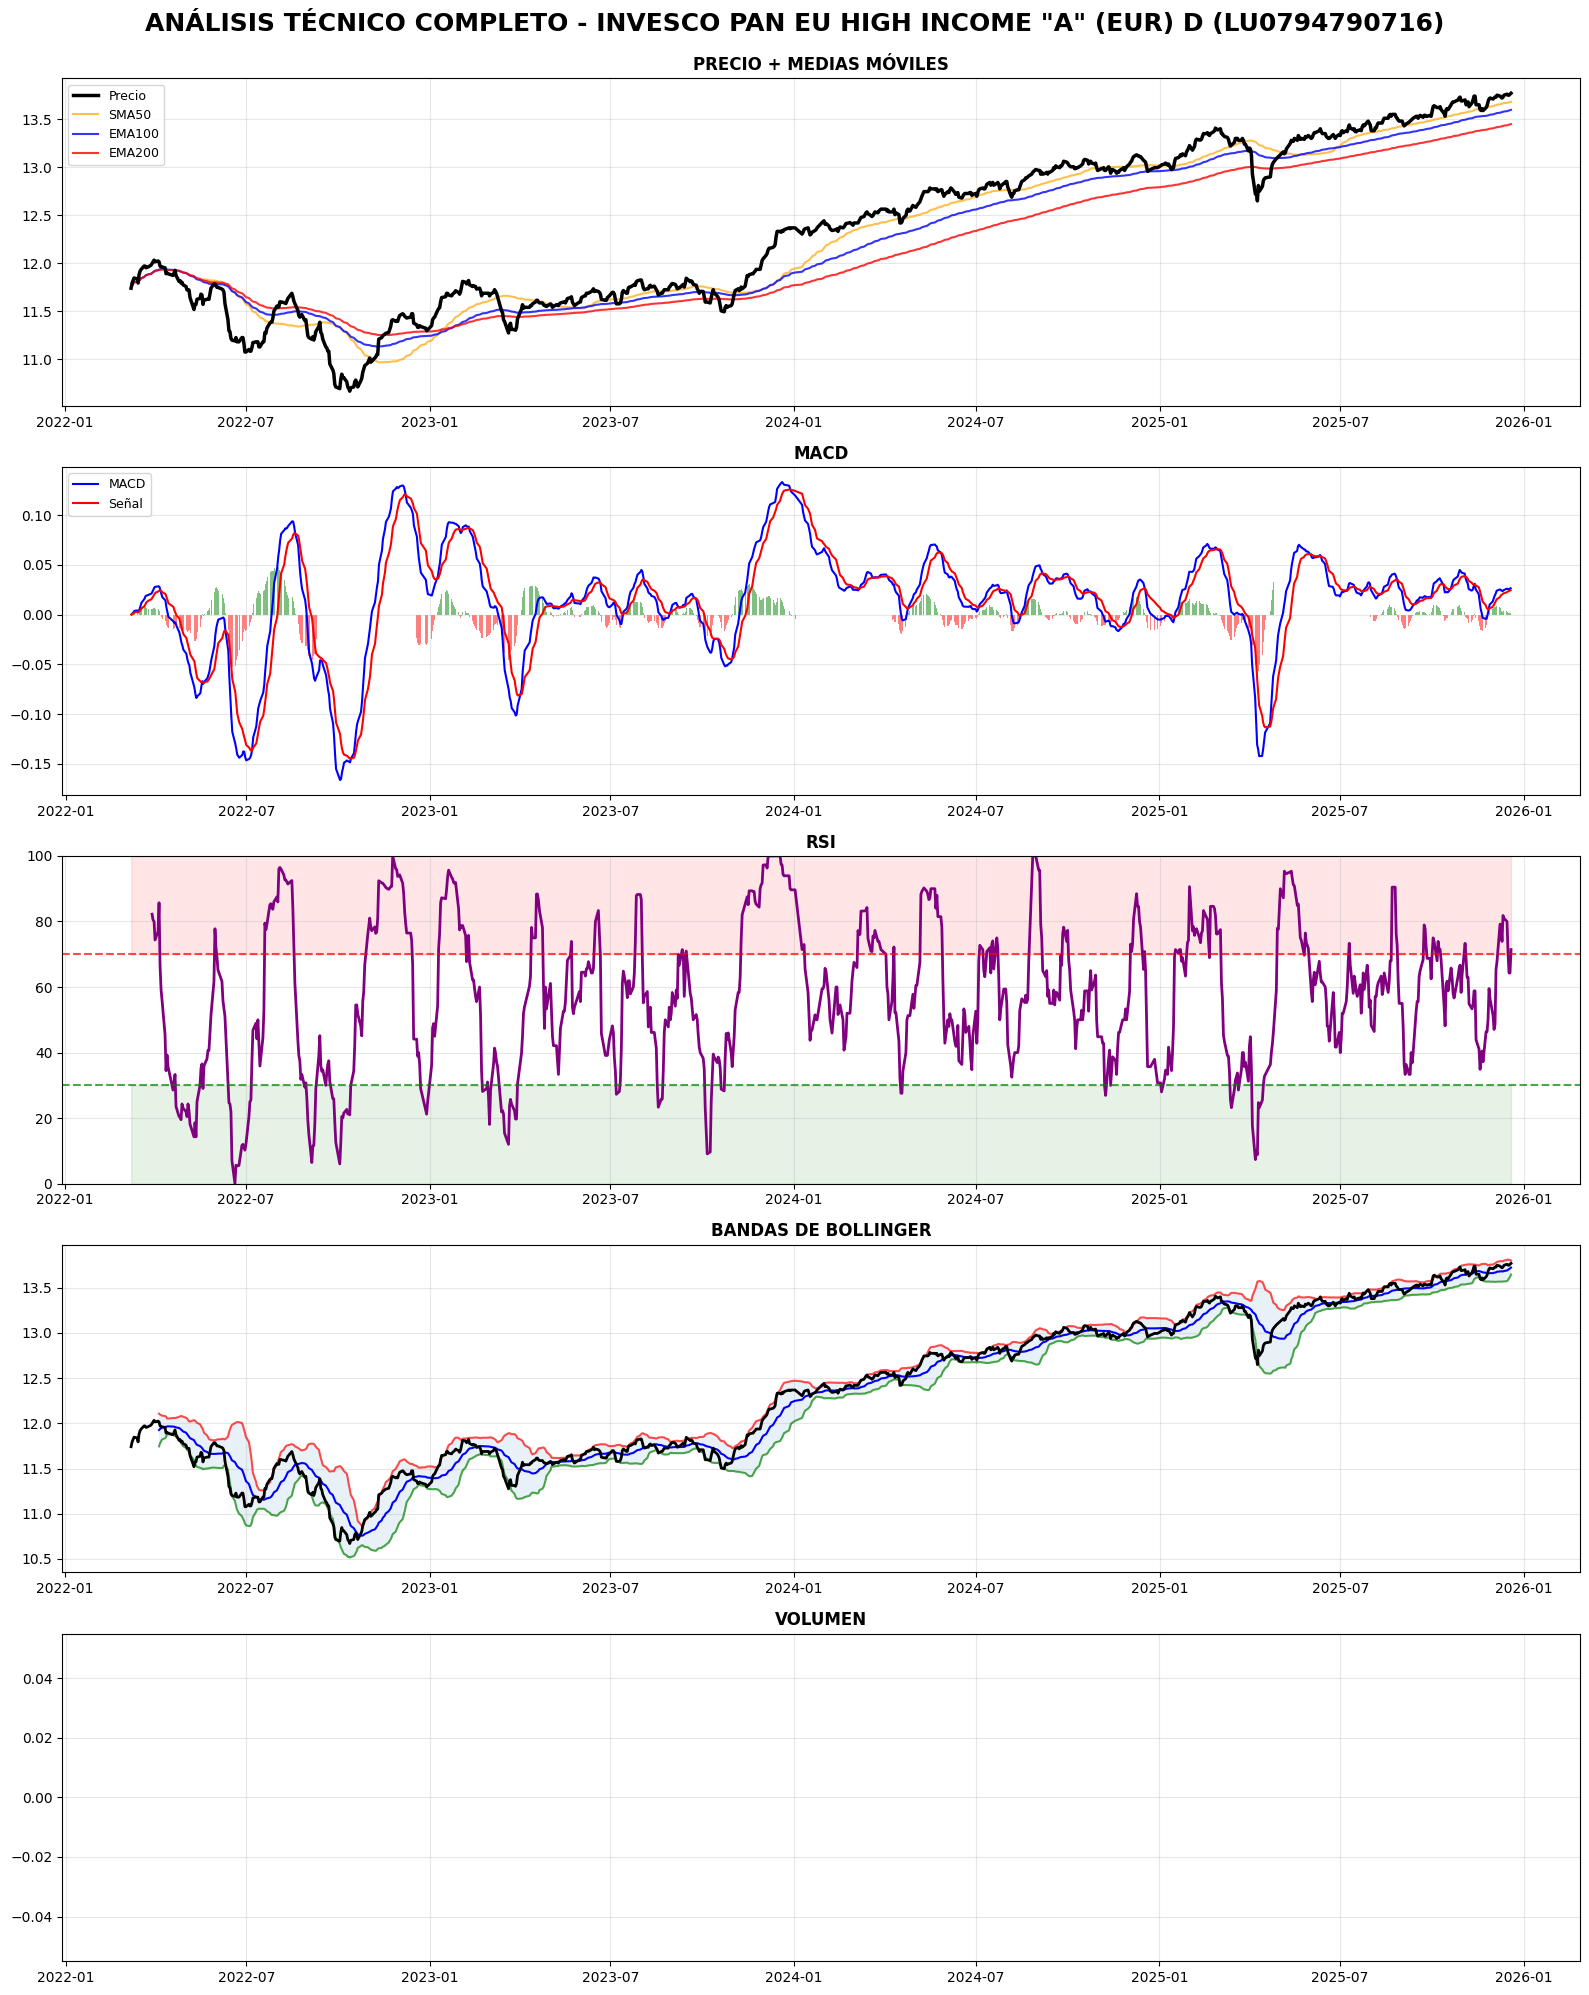


📋 MENÚ PRINCIPAL V3.0 - COMPLETO

🔹 ANÁLISIS CLÁSICOS (V2.0):
  1. 📊 Análisis Básico Rápido
  2. ⚙️  Análisis Técnico Completo (Métricas)
  3. 🩺 Diagnóstico Detallado + Explicaciones
  4. 📈 Mostrar Gráficas Completas (matplotlib)
  5. 📄 Generar Informe HTML Mejorado

🔹 FUNCIONES PROFESIONALES (V3.0):
  6. 🎯 Comparar con Benchmark
  7. 🔄 Backtesting de Estrategias
  8. 📈 Optimización de Cartera (Markowitz)
  9. 🚨 Sistema de Alertas
 10. 📊 Gráfico Interactivo (Plotly)
 11. 📑 Exportar a Excel

🔹 GENERAL:
 12. 🔄 Cambiar Activo
 13. 🚪 Salir



Selecciona opción (1-13):  6



🎯 COMPARACIÓN CON BENCHMARK

Benchmarks disponibles:
  [1] S&P 500
  [2] Ibex 35
  [3] MSCI World
  [4] Euro Stoxx 50



Selecciona benchmark (1-4):  4


📥 Descargando Euro Stoxx 50 (^STOXX50E)...
✅ Euro Stoxx 50 descargado (953 días)

📊 MÉTRICAS COMPARATIVAS DETALLADAS

🔹 RENDIMIENTO:
   • Rendimiento Activo                 :     17.19%
   • Rendimiento Benchmark              :     63.80%
   • Exceso de Rendimiento              :    -46.61%

🔹 RIESGO (Volatilidad):
   • Volatilidad Activo (anual)         :      4.55%
   • Volatilidad Benchmark (anual)      :     17.12%
   • Tracking Error                     :     15.15%

🔹 MÉTRICAS AJUSTADAS POR RIESGO:
   • Beta                               :     0.1440
   • Alfa (anual)                       :      2.30%
   • R² (R-cuadrado)                    :     0.2929
   • Correlación                        :     0.5412

🔹 RATIOS DE DESEMPEÑO:
   • Sharpe Ratio Activo                :     0.9827
   • Sharpe Ratio Benchmark             :     0.8794
   • Information Ratio                  :     0.1521

📖 INTERPRETACIÓN

📊 Beta (0.1440): 🟢 MENOS VOLÁTIL que el benchmark
📈 Alfa (2.30%): 🟢 SUPERA a

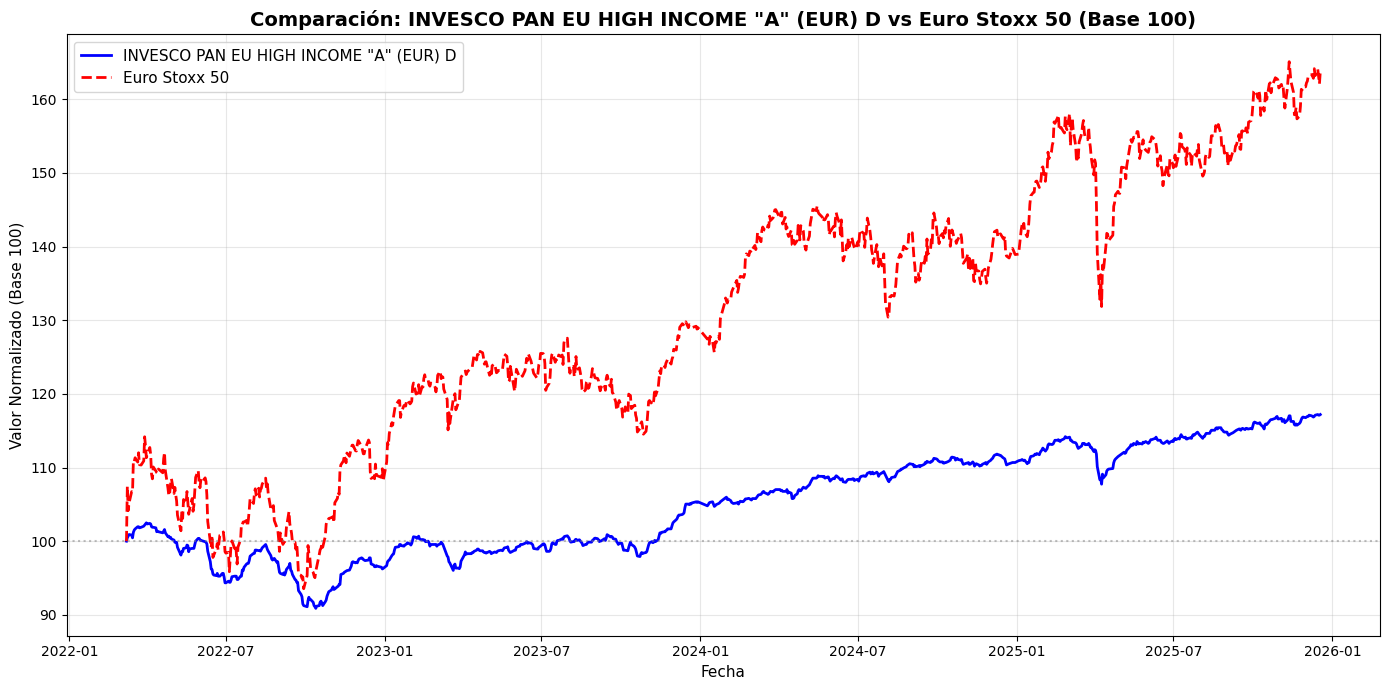


📋 MENÚ PRINCIPAL V3.0 - COMPLETO

🔹 ANÁLISIS CLÁSICOS (V2.0):
  1. 📊 Análisis Básico Rápido
  2. ⚙️  Análisis Técnico Completo (Métricas)
  3. 🩺 Diagnóstico Detallado + Explicaciones
  4. 📈 Mostrar Gráficas Completas (matplotlib)
  5. 📄 Generar Informe HTML Mejorado

🔹 FUNCIONES PROFESIONALES (V3.0):
  6. 🎯 Comparar con Benchmark
  7. 🔄 Backtesting de Estrategias
  8. 📈 Optimización de Cartera (Markowitz)
  9. 🚨 Sistema de Alertas
 10. 📊 Gráfico Interactivo (Plotly)
 11. 📑 Exportar a Excel

🔹 GENERAL:
 12. 🔄 Cambiar Activo
 13. 🚪 Salir



Selecciona opción (1-13):  7



🔄 BACKTESTING DE ESTRATEGIAS


Capital inicial (€, ej: 10000):  10000



🎯 BACKTESTING DE ESTRATEGIAS

         Estrategia Capital Final Rendimiento  Operaciones
         Buy & Hold    €11,727.74      17.28%            1
Cruce EMAs (50/200)    €11,943.92      19.44%            1
        RSI (30/70)    €10,000.00       0.00%            0
               MACD    €12,590.14      25.90%           33

📋 MENÚ PRINCIPAL V3.0 - COMPLETO

🔹 ANÁLISIS CLÁSICOS (V2.0):
  1. 📊 Análisis Básico Rápido
  2. ⚙️  Análisis Técnico Completo (Métricas)
  3. 🩺 Diagnóstico Detallado + Explicaciones
  4. 📈 Mostrar Gráficas Completas (matplotlib)
  5. 📄 Generar Informe HTML Mejorado

🔹 FUNCIONES PROFESIONALES (V3.0):
  6. 🎯 Comparar con Benchmark
  7. 🔄 Backtesting de Estrategias
  8. 📈 Optimización de Cartera (Markowitz)
  9. 🚨 Sistema de Alertas
 10. 📊 Gráfico Interactivo (Plotly)
 11. 📑 Exportar a Excel

🔹 GENERAL:
 12. 🔄 Cambiar Activo
 13. 🚪 Salir



Selecciona opción (1-13):  8



📈 OPTIMIZACIÓN DE CARTERA (MARKOWITZ)
Selecciona activos para la cartera (mínimo 2):
[1] INVESCO PAN EU HIGH INCOME "A" (EUR) D (LU0794790716)
[2] S&P 500 (US78378X1072)
[3] Dunas Valor Prudente FI Clase R (ES0175437005)
[4] Dunas Valor Flexible FI Clase R (ES0175316019)
[5] Dunas Valor Equilibrado FI Clase R (ES0175414012)
[6] INVESCO PAN EUROPEAN HIGH INCOME "A" D (LU0243957312)
[7] AMUNDI FD GLB M-A CONSERV "A" (EUR) ACC (LU1883329432)
[8] MSCI world (MSCI_world)
[9] PICTET MULTI ASSET GLB OPPR "P" (EUR) (LU0941349192)
[10] UNIFONDO PATRIMONIO CLASE A FI (ES0175858036)
[11] Ibex 35 (^IBEX)
[12] PICTET MULTI ASSET GL "P" (EUR) D (LU0950511468)
[13] Renta 4 Valor Relativo FI Clase R (ES0128522002)
[14] PIMCO GIS STRAT INCOME "E" (EUR) (IE00BG800Y73)
[15] CARTESIO FUNDS INCOME "R" (EUR) (LU1966822956)
[16] INVESCO PAN EUROPEAN HIGH INCOME "A" (LU0243957239)
[17] abrdn SICAV I - DIVE "A G" (EURHDG) D A (LU1239090977)
[18] ODDO BHF POLARIS MODERATE "CR" (EUR) (DE000A2JJ1W5)



Números separados por comas (ej: 1,2,3):  1, 2, 17, 4, 12


✅ Matriz de retornos calculada (921 días)

📊 OPTIMIZACIÓN DE CARTERA (MARKOWITZ)

🛡️  CARTERA DE MÍNIMA VARIANZA:
   • INVESCO PAN EU HIGH INCOME "A" (EUR) D: 9.5%
   • S&P 500: 0.0%
   • abrdn SICAV I - DIVE "A G" (EURHDG) D A: 3.2%
   • Dunas Valor Flexible FI Clase R: 67.7%
   • PICTET MULTI ASSET GL "P" (EUR) D: 19.6%

⚡ CARTERA DE MÁXIMO SHARPE RATIO:
   • INVESCO PAN EU HIGH INCOME "A" (EUR) D: 0.0%
   • S&P 500: 6.5%
   • abrdn SICAV I - DIVE "A G" (EURHDG) D A: 0.0%
   • Dunas Valor Flexible FI Clase R: 93.5%
   • PICTET MULTI ASSET GL "P" (EUR) D: 0.0%


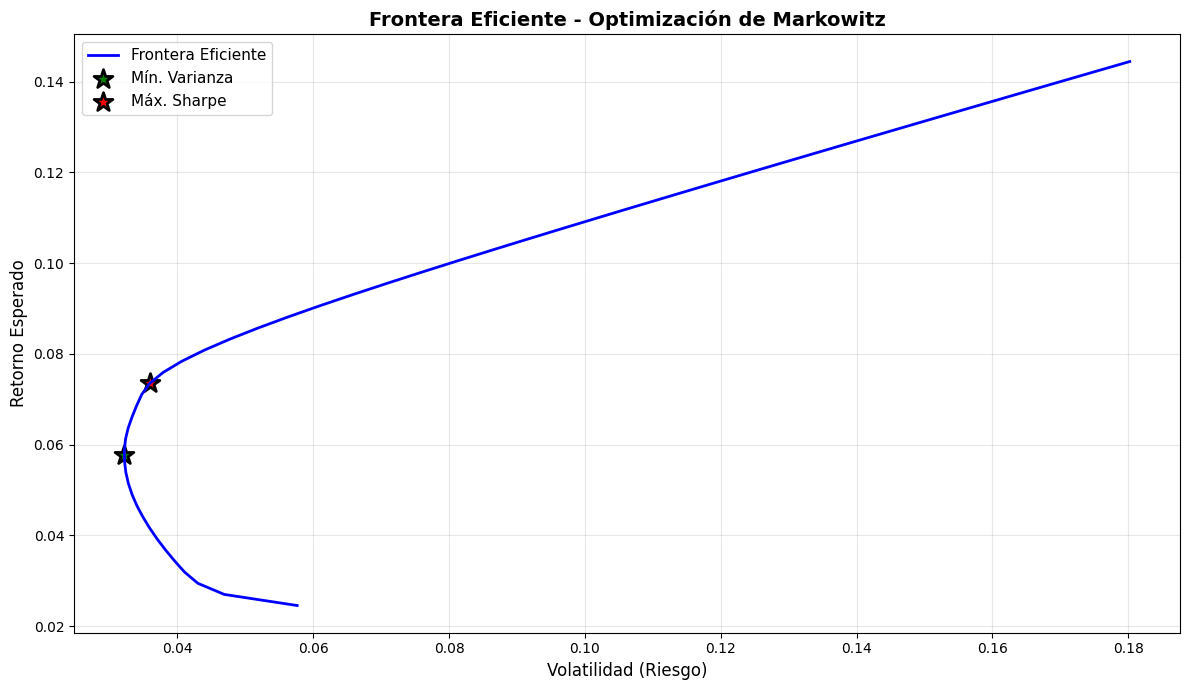


📋 MENÚ PRINCIPAL V3.0 - COMPLETO

🔹 ANÁLISIS CLÁSICOS (V2.0):
  1. 📊 Análisis Básico Rápido
  2. ⚙️  Análisis Técnico Completo (Métricas)
  3. 🩺 Diagnóstico Detallado + Explicaciones
  4. 📈 Mostrar Gráficas Completas (matplotlib)
  5. 📄 Generar Informe HTML Mejorado

🔹 FUNCIONES PROFESIONALES (V3.0):
  6. 🎯 Comparar con Benchmark
  7. 🔄 Backtesting de Estrategias
  8. 📈 Optimización de Cartera (Markowitz)
  9. 🚨 Sistema de Alertas
 10. 📊 Gráfico Interactivo (Plotly)
 11. 📑 Exportar a Excel

🔹 GENERAL:
 12. 🔄 Cambiar Activo
 13. 🚪 Salir



Selecciona opción (1-13):  8



📈 OPTIMIZACIÓN DE CARTERA (MARKOWITZ)
Selecciona activos para la cartera (mínimo 2):
[1] INVESCO PAN EU HIGH INCOME "A" (EUR) D (LU0794790716)
[2] S&P 500 (US78378X1072)
[3] Dunas Valor Prudente FI Clase R (ES0175437005)
[4] Dunas Valor Flexible FI Clase R (ES0175316019)
[5] Dunas Valor Equilibrado FI Clase R (ES0175414012)
[6] INVESCO PAN EUROPEAN HIGH INCOME "A" D (LU0243957312)
[7] AMUNDI FD GLB M-A CONSERV "A" (EUR) ACC (LU1883329432)
[8] MSCI world (MSCI_world)
[9] PICTET MULTI ASSET GLB OPPR "P" (EUR) (LU0941349192)
[10] UNIFONDO PATRIMONIO CLASE A FI (ES0175858036)
[11] Ibex 35 (^IBEX)
[12] PICTET MULTI ASSET GL "P" (EUR) D (LU0950511468)
[13] Renta 4 Valor Relativo FI Clase R (ES0128522002)
[14] PIMCO GIS STRAT INCOME "E" (EUR) (IE00BG800Y73)
[15] CARTESIO FUNDS INCOME "R" (EUR) (LU1966822956)
[16] INVESCO PAN EUROPEAN HIGH INCOME "A" (LU0243957239)
[17] abrdn SICAV I - DIVE "A G" (EURHDG) D A (LU1239090977)
[18] ODDO BHF POLARIS MODERATE "CR" (EUR) (DE000A2JJ1W5)



Números separados por comas (ej: 1,2,3):  1, 5, 12, 15, 18


✅ Matriz de retornos calculada (921 días)

📊 OPTIMIZACIÓN DE CARTERA (MARKOWITZ)

🛡️  CARTERA DE MÍNIMA VARIANZA:
   • INVESCO PAN EU HIGH INCOME "A" (EUR) D: 0.0%
   • Dunas Valor Equilibrado FI Clase R: 92.2%
   • PICTET MULTI ASSET GL "P" (EUR) D: 1.1%
   • CARTESIO FUNDS INCOME "R" (EUR): 0.0%
   • ODDO BHF POLARIS MODERATE "CR" (EUR): 6.8%

⚡ CARTERA DE MÁXIMO SHARPE RATIO:
   • INVESCO PAN EU HIGH INCOME "A" (EUR) D: 0.0%
   • Dunas Valor Equilibrado FI Clase R: 69.6%
   • PICTET MULTI ASSET GL "P" (EUR) D: 0.0%
   • CARTESIO FUNDS INCOME "R" (EUR): 30.4%
   • ODDO BHF POLARIS MODERATE "CR" (EUR): 0.0%


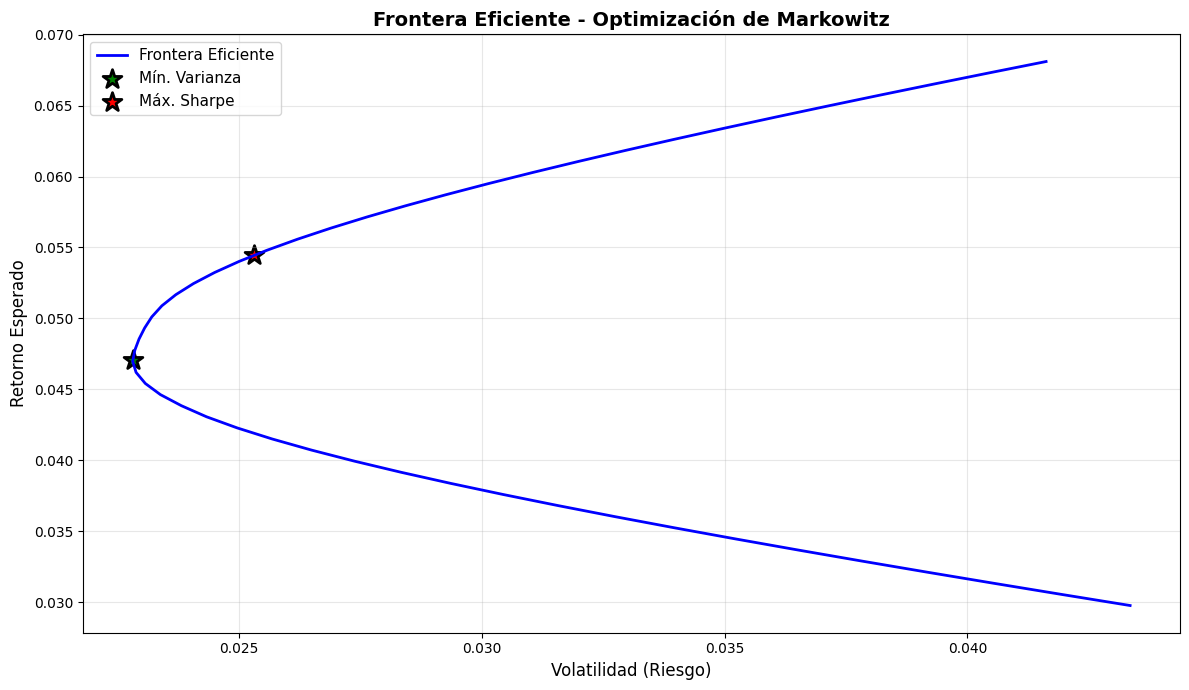


📋 MENÚ PRINCIPAL V3.0 - COMPLETO

🔹 ANÁLISIS CLÁSICOS (V2.0):
  1. 📊 Análisis Básico Rápido
  2. ⚙️  Análisis Técnico Completo (Métricas)
  3. 🩺 Diagnóstico Detallado + Explicaciones
  4. 📈 Mostrar Gráficas Completas (matplotlib)
  5. 📄 Generar Informe HTML Mejorado

🔹 FUNCIONES PROFESIONALES (V3.0):
  6. 🎯 Comparar con Benchmark
  7. 🔄 Backtesting de Estrategias
  8. 📈 Optimización de Cartera (Markowitz)
  9. 🚨 Sistema de Alertas
 10. 📊 Gráfico Interactivo (Plotly)
 11. 📑 Exportar a Excel

🔹 GENERAL:
 12. 🔄 Cambiar Activo
 13. 🚪 Salir



Selecciona opción (1-13):  9



🚨 SISTEMA DE ALERTAS
1. Configurar nueva alerta
2. Ver alertas activas
3. Verificar alertas ahora



Opción:  1



Tipos de alerta:
1. Precio
2. RSI


Tipo:  1
Condición (>, <):  14
Valor:  14


✅ Alerta configurada: precio 14 14.0

📋 MENÚ PRINCIPAL V3.0 - COMPLETO

🔹 ANÁLISIS CLÁSICOS (V2.0):
  1. 📊 Análisis Básico Rápido
  2. ⚙️  Análisis Técnico Completo (Métricas)
  3. 🩺 Diagnóstico Detallado + Explicaciones
  4. 📈 Mostrar Gráficas Completas (matplotlib)
  5. 📄 Generar Informe HTML Mejorado

🔹 FUNCIONES PROFESIONALES (V3.0):
  6. 🎯 Comparar con Benchmark
  7. 🔄 Backtesting de Estrategias
  8. 📈 Optimización de Cartera (Markowitz)
  9. 🚨 Sistema de Alertas
 10. 📊 Gráfico Interactivo (Plotly)
 11. 📑 Exportar a Excel

🔹 GENERAL:
 12. 🔄 Cambiar Activo
 13. 🚪 Salir



Selecciona opción (1-13):  9



🚨 SISTEMA DE ALERTAS
1. Configurar nueva alerta
2. Ver alertas activas
3. Verificar alertas ahora



Opción:  1



Tipos de alerta:
1. Precio
2. RSI


Tipo:  1
Condición (>, <):  >
Valor:  13.50


✅ Alerta configurada: precio > 13.5

📋 MENÚ PRINCIPAL V3.0 - COMPLETO

🔹 ANÁLISIS CLÁSICOS (V2.0):
  1. 📊 Análisis Básico Rápido
  2. ⚙️  Análisis Técnico Completo (Métricas)
  3. 🩺 Diagnóstico Detallado + Explicaciones
  4. 📈 Mostrar Gráficas Completas (matplotlib)
  5. 📄 Generar Informe HTML Mejorado

🔹 FUNCIONES PROFESIONALES (V3.0):
  6. 🎯 Comparar con Benchmark
  7. 🔄 Backtesting de Estrategias
  8. 📈 Optimización de Cartera (Markowitz)
  9. 🚨 Sistema de Alertas
 10. 📊 Gráfico Interactivo (Plotly)
 11. 📑 Exportar a Excel

🔹 GENERAL:
 12. 🔄 Cambiar Activo
 13. 🚪 Salir



Selecciona opción (1-13):  11



📑 EXPORTANDO A EXCEL...


💰 Monto invertido (€, ej: 10000):  10000


✅ Excel exportado: ./Informes_unicaja/LU0794790716_analisis_completo.xlsx

📋 MENÚ PRINCIPAL V3.0 - COMPLETO

🔹 ANÁLISIS CLÁSICOS (V2.0):
  1. 📊 Análisis Básico Rápido
  2. ⚙️  Análisis Técnico Completo (Métricas)
  3. 🩺 Diagnóstico Detallado + Explicaciones
  4. 📈 Mostrar Gráficas Completas (matplotlib)
  5. 📄 Generar Informe HTML Mejorado

🔹 FUNCIONES PROFESIONALES (V3.0):
  6. 🎯 Comparar con Benchmark
  7. 🔄 Backtesting de Estrategias
  8. 📈 Optimización de Cartera (Markowitz)
  9. 🚨 Sistema de Alertas
 10. 📊 Gráfico Interactivo (Plotly)
 11. 📑 Exportar a Excel

🔹 GENERAL:
 12. 🔄 Cambiar Activo
 13. 🚪 Salir


In [ ]:
import os
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import inspect
from scipy.optimize import minimize
import json

# Sistema de gestión de carteras
# 📌 Introducción
print("Bienvenido al sistema de análisis de carteras conservadoras.")
print("Este notebook está diseñado para usuarios sin formación informática.")
print("Por favor, contrasta los resultados con otras fuentes antes de tomar decisiones financieras.")

# ⚠️ Descargo de responsabilidad
print("""
⚠️ **ADVERTENCIA IMPORTANTE:**

Este programa se proporciona **exclusivamente con fines educativos**.
No debe interpretarse como **asesoramiento financiero, legal o de inversión**.

El autor y los colaboradores **no se hacen responsables** de:
- Pérdidas, daños o decisiones de inversión tomadas basándose en este análisis.
- El uso incorrecto o la interpretación errónea de los resultados.

**Recomendación:**
Antes de tomar cualquier decisión financiera, consulta con un **asesor profesional certificado**.
""")

# Intentar importar librerías opcionales
try:
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
except ImportError:
    PLOTLY_AVAILABLE = False
    print("⚠️  Plotly no disponible. Instala con: pip install plotly")

try:
    from openpyxl import Workbook
    from openpyxl.styles import Font, PatternFill, Alignment, Border, Side
    from openpyxl.chart import LineChart, Reference
    OPENPYXL_AVAILABLE = True
except ImportError:
    OPENPYXL_AVAILABLE = False
    print("⚠️  OpenPyXL no disponible. Instala con: pip install openpyxl")

try:
    import smtplib
    from email.mime.text import MIMEText
    from email.mime.multipart import MIMEMultipart
    EMAIL_AVAILABLE = True
except ImportError:
    EMAIL_AVAILABLE = False

# ============================================================
# FUNCIONES AUXILIARES V2.0 (para compatibilidad)
# ============================================================

def calcular_metricas_tecnicas_mejoradas(df, fecha_inicio, fecha_fin, invertido, benchmark_df=None):
    """Calcula métricas técnicas mejoradas con diagnóstico (y opcionalmente vs benchmark)"""
    fecha_inicio = pd.to_datetime(fecha_inicio)
    fecha_fin = pd.to_datetime(fecha_fin)

    df_rango = df.loc[(df.index >= fecha_inicio) & (df.index <= fecha_fin)].copy()

    # Validación mejorada
    if len(df_rango) < 50:
        print(f"\n❌ DATOS INSUFICIENTES")
        print(f"   • Días encontrados en el rango: {len(df_rango)}")
        print(f"   • Mínimo requerido: 50 días")
        print(f"\n📅 RANGO DISPONIBLE EN EL FICHERO:")
        print(f"   • Desde: {df.index[0].strftime('%Y-%m-%d')}")
        print(f"   • Hasta: {df.index[-1].strftime('%Y-%m-%d')}")
        print(f"   • Total días: {len(df)}")
        print(f"\n💡 Sugerencia: Usa Enter para analizar todo el periodo disponible")
        return pd.DataFrame(), {}

    # Indicadores básicos
    df_rango['SMA_20'] = df_rango['Close'].rolling(20).mean()
    df_rango['SMA_50'] = df_rango['Close'].rolling(50).mean()
    df_rango['EMA_20'] = df_rango['Close'].ewm(span=20).mean()

    # RSI
    delta = df_rango['Close'].diff()
    gain = delta.clip(lower=0).rolling(14).mean()
    loss = (-delta.clip(upper=0)).rolling(14).mean()
    rs = gain / loss
    df_rango['RSI'] = 100 - (100 / (1 + rs))

    # Bandas de Bollinger
    sma_bb = df_rango['Close'].rolling(20).mean()
    std_bb = df_rango['Close'].rolling(20).std()
    df_rango['BB_upper'] = sma_bb + std_bb * 2
    df_rango['BB_lower'] = sma_bb - std_bb * 2
    df_rango['BB_middle'] = sma_bb

    # MACD
    ema12 = df_rango['Close'].ewm(span=12).mean()
    ema26 = df_rango['Close'].ewm(span=26).mean()
    df_rango['MACD'] = ema12 - ema26
    df_rango['MACD_signal'] = df_rango['MACD'].ewm(span=9).mean()
    df_rango['MACD_histogram'] = df_rango['MACD'] - df_rango['MACD_signal']

    # Indicadores adicionales
    if 'High' in df_rango.columns and 'Low' in df_rango.columns:
        df_rango['ATR'] = calcular_atr(df_rango)
        stoch_k, stoch_d = calcular_estocastico(df_rango)
        df_rango['Stoch_K'] = stoch_k
        df_rango['Stoch_D'] = stoch_d

        adx, pos_di, neg_di = calcular_adx(df_rango)
        df_rango['ADX'] = adx
        df_rango['POS_DI'] = pos_di
        df_rango['NEG_DI'] = neg_di

    # Métricas financieras
    precio_inicial = df_rango['Close'].iloc[0]
    acciones = invertido / precio_inicial
    precio_actual = df_rango['Close'].iloc[-1]
    valor_actual = acciones * precio_actual
    rendimiento = (valor_actual / invertido) - 1

    t = (fecha_fin - fecha_inicio).days / 365.25
    cagr = (valor_actual / invertido) ** (1/t) - 1 if t > 0 else np.nan

    retornos = df_rango['Close'].pct_change().dropna()
    vol_anual = retornos.std() * np.sqrt(252)
    sharpe = cagr / vol_anual if not np.isnan(cagr) and vol_anual > 0 else np.nan

    ret_neg = retornos[retornos < 0]
    down_risk = ret_neg.std() * np.sqrt(252) if len(ret_neg) > 0 else np.nan
    sortino = cagr / down_risk if not np.isnan(cagr) and down_risk > 0 else np.nan

    peak = df_rango['Close'].cummax()
    drawdown = (df_rango['Close'] - peak) / peak
    max_dd = drawdown.min()

    # Calmar Ratio
    calmar = abs(cagr / max_dd) if max_dd != 0 else np.nan

    # VaR al 95%
    var_95 = np.percentile(retornos, 5)

    # === MÉTRICAS VS BENCHMARK (si se proporciona) ===
    beta = np.nan
    alfa = np.nan
    r_squared = np.nan
    correlacion = np.nan

    if benchmark_df is not None:
        try:
            # Alinear fechas
            fechas_comunes = df_rango.index.intersection(benchmark_df.index)
            if len(fechas_comunes) >= 50:
                activo_bench = df_rango.loc[fechas_comunes, 'Close'].copy()
                benchmark_bench = benchmark_df.loc[fechas_comunes, 'Close'].copy()

                # Asegurar Series
                if isinstance(activo_bench, pd.DataFrame):
                    activo_bench = activo_bench.iloc[:, 0]
                if isinstance(benchmark_bench, pd.DataFrame):
                    benchmark_bench = benchmark_bench.iloc[:, 0]

                # Retornos
                ret_activo_bench = activo_bench.pct_change().dropna()
                ret_benchmark_bench = benchmark_bench.pct_change().dropna()

                # Alinear retornos
                fechas_ret = ret_activo_bench.index.intersection(ret_benchmark_bench.index)
                ret_activo_bench = ret_activo_bench.loc[fechas_ret]
                ret_benchmark_bench = ret_benchmark_bench.loc[fechas_ret]

                if len(ret_activo_bench) >= 50:
                    # Beta
                    covariance = np.cov(ret_activo_bench.values, ret_benchmark_bench.values)[0, 1]
                    variance_benchmark = np.var(ret_benchmark_bench.values)
                    beta = covariance / variance_benchmark if variance_benchmark > 0 else np.nan

                    # Alfa
                    ret_activo_annual = ret_activo_bench.mean() * 252
                    ret_benchmark_annual = ret_benchmark_bench.mean() * 252
                    alfa = ret_activo_annual - (beta * ret_benchmark_annual) if not np.isnan(beta) else np.nan

                    # R² y Correlación
                    correlacion = ret_activo_bench.corr(ret_benchmark_bench)
                    r_squared = correlacion ** 2
        except Exception as e:
            print(f"⚠️  No se pudieron calcular métricas vs benchmark: {e}")

    # Generar diagnóstico mejorado
    diag = generar_diagnostico_mejorado(
        precio_actual, precio_inicial, df_rango, rendimiento,
        cagr, sharpe, sortino, max_dd, vol_anual,
        beta, alfa, r_squared
    )

    # Preparar resumen
    resultados = {
        '=== DATOS BÁSICOS ===': '',
        'Monto Invertido': f"€{invertido:,.2f}",
        'Precio Inicial': f"€{precio_inicial:,.2f}",
        'Precio Actual': f"€{precio_actual:,.2f}",
        'Valor Actual': f"€{valor_actual:,.2f}",
        'Ganancia/Pérdida': f"€{(valor_actual-invertido):+,.2f}",
        '': '',
        '=== RENTABILIDAD ===': '',
        'Rendimiento Total': f"{rendimiento:.2%}",
        'CAGR (anualizado)': f"{cagr:.2%}" if not np.isnan(cagr) else "N/A",
        '  ': '',
        '=== RIESGO ===': '',
        'Volatilidad Anual': f"{vol_anual:.2%}",
        'Sharpe Ratio': f"{sharpe:.2f}" if not np.isnan(sharpe) else "N/A",
        'Sortino Ratio': f"{sortino:.2f}" if not np.isnan(sortino) else "N/A",
        'Max Drawdown': f"{max_dd:.2%}",
        'Calmar Ratio': f"{calmar:.2f}" if not np.isnan(calmar) else "N/A",
        'VaR 95% (diario)': f"{var_95:.2%}",
    }

    # Añadir métricas vs benchmark si están disponibles
    if not np.isnan(beta):
        resultados['   '] = ''
        resultados['=== VS BENCHMARK (S&P 500) ==='] = ''
        resultados['Beta'] = f"{beta:.4f}"
        resultados['Alfa (anual)'] = f"{alfa:.2%}" if not np.isnan(alfa) else "N/A"
        resultados['R² (R-cuadrado)'] = f"{r_squared:.4f}" if not np.isnan(r_squared) else "N/A"
        resultados['Correlación'] = f"{correlacion:.4f}" if not np.isnan(correlacion) else "N/A"

    # Añadir indicadores técnicos actuales
    resultados['    '] = ''
    resultados['=== INDICADORES ACTUALES ==='] = ''
    resultados['RSI (14)'] = f"{df_rango['RSI'].iloc[-1]:.1f}"
    resultados['MACD Histogram'] = f"{df_rango['MACD_histogram'].iloc[-1]:.4f}"

    if 'ATR' in df_rango.columns:
        resultados['ATR (14)'] = f"{df_rango['ATR'].iloc[-1]:.2f}"
    if 'Stoch_K' in df_rango.columns:
        resultados['Estocástico %K'] = f"{df_rango['Stoch_K'].iloc[-1]:.1f}"
    if 'ADX' in df_rango.columns:
        resultados['ADX (14)'] = f"{df_rango['ADX'].iloc[-1]:.1f}"

    return pd.DataFrame(resultados.items(), columns=['Métrica', 'Valor']), diag

def generar_diagnostico_mejorado(precio_actual, precio_inicial, df_rango,
                                  rendimiento_bruto, cagr, sharpe, sortino,
                                  max_drawdown, volatilidad_anual,
                                  beta=np.nan, alfa=np.nan, r_squared=np.nan):
    """Genera diagnóstico detallado con explicaciones"""

    diagnosticos = {}

    # === RENDIMIENTO TOTAL ===
    if rendimiento_bruto > 0.30:
        diagnosticos['Rendimiento Total'] = {
            'valor': f"{rendimiento_bruto:.2%}",
            'estado': "🟢 EXCELENTE",
            'explicacion': EXPLICACIONES['Rendimiento']
        }
    elif rendimiento_bruto > 0.15:
        diagnosticos['Rendimiento Total'] = {
            'valor': f"{rendimiento_bruto:.2%}",
            'estado': "🟡 BUENO",
            'explicacion': EXPLICACIONES['Rendimiento']
        }
    elif rendimiento_bruto > 0:
        diagnosticos['Rendimiento Total'] = {
            'valor': f"{rendimiento_bruto:.2%}",
            'estado': "🟠 MODESTO",
            'explicacion': EXPLICACIONES['Rendimiento']
        }
    else:
        diagnosticos['Rendimiento Total'] = {
            'valor': f"{rendimiento_bruto:.2%}",
            'estado': "🔴 NEGATIVO",
            'explicacion': EXPLICACIONES['Rendimiento']
        }

    # === CAGR (ANUALIZADO) ===
    if not np.isnan(cagr):
        if cagr > 0.15:
            estado = "🟢 EXCELENTE"
        elif cagr > 0.08:
            estado = "🟡 BUENO"
        elif cagr > 0.03:
            estado = "🟠 MODESTO"
        elif cagr > 0:
            estado = "🟡 POSITIVO"
        else:
            estado = "🔴 NEGATIVO"

        diagnosticos['CAGR (Anualizado)'] = {
            'valor': f"{cagr:.2%}",
            'estado': estado,
            'explicacion': EXPLICACIONES['CAGR']
        }

    # === SHARPE ===
    if not np.isnan(sharpe):
        if sharpe >= 1.5:
            estado = "🟢 EXCELENTE"
        elif sharpe >= 1.0:
            estado = "🟡 BUENO"
        elif sharpe >= 0.5:
            estado = "🟠 DÉBIL"
        else:
            estado = "🔴 MALO"

        diagnosticos['Sharpe Ratio'] = {
            'valor': f"{sharpe:.2f}",
            'estado': estado,
            'explicacion': EXPLICACIONES['Sharpe']
        }

    # === SORTINO ===
    if not np.isnan(sortino):
        if sortino >= 2.0:
            estado = "🟢 EXCELENTE"
        elif sortino >= 1.5:
            estado = "🟡 BUENO"
        elif sortino >= 1.0:
            estado = "🟠 DÉBIL"
        else:
            estado = "🔴 MALO"

        diagnosticos['Sortino Ratio'] = {
            'valor': f"{sortino:.2f}",
            'estado': estado,
            'explicacion': EXPLICACIONES['Sortino']
        }

    # === MAX DRAWDOWN ===
    if max_drawdown > -0.10:
        estado = "🟢 BAJO"
    elif max_drawdown > -0.20:
        estado = "🟡 MODERADO"
    elif max_drawdown > -0.30:
        estado = "🟠 ALTO"
    else:
        estado = "🔴 CRÍTICO"

    diagnosticos['Max Drawdown'] = {
        'valor': f"{max_drawdown:.2%}",
        'estado': estado,
        'explicacion': EXPLICACIONES['Max Drawdown']
    }

    # === VOLATILIDAD ===
    if volatilidad_anual < 0.15:
        estado = "🟢 BAJA"
    elif volatilidad_anual < 0.30:
        estado = "🟡 MODERADA"
    elif volatilidad_anual < 0.50:
        estado = "🟠 ALTA"
    else:
        estado = "🔴 MUY ALTA"

    diagnosticos['Volatilidad'] = {
        'valor': f"{volatilidad_anual:.2%}",
        'estado': estado,
        'explicacion': EXPLICACIONES['Volatilidad']
    }

    # === BETA (vs S&P 500) ===
    if not np.isnan(beta):
        if beta > 1.1:
            estado = "🔴 ALTA VOLATILIDAD"
        elif beta < 0.9:
            estado = "🟢 BAJA VOLATILIDAD"
        else:
            estado = "🟡 VOLATILIDAD NORMAL"

        diagnosticos['Beta (vs S&P 500)'] = {
            'valor': f"{beta:.4f}",
            'estado': estado,
            'explicacion': EXPLICACIONES['Beta']
        }

    # === ALFA (vs S&P 500) ===
    if not np.isnan(alfa):
        if alfa > 0.02:
            estado = "🟢 SUPERA BENCHMARK"
        elif alfa < -0.02:
            estado = "🔴 INFERIOR BENCHMARK"
        else:
            estado = "🟡 SIMILAR BENCHMARK"

        diagnosticos['Alfa (vs S&P 500)'] = {
            'valor': f"{alfa:.2%}",
            'estado': estado,
            'explicacion': EXPLICACIONES['Alfa']
        }

    # === R² (vs S&P 500) ===
    if not np.isnan(r_squared):
        if r_squared > 0.8:
            estado = "🔴 MUY CORRELACIONADO"
        elif r_squared > 0.5:
            estado = "🟡 MODERADAMENTE CORRELACIONADO"
        else:
            estado = "🟢 POCO CORRELACIONADO"

        diagnosticos['R² (vs S&P 500)'] = {
            'valor': f"{r_squared:.4f}",
            'estado': estado,
            'explicacion': EXPLICACIONES['R²']
        }

    # === RSI ===
    rsi = df_rango['RSI'].iloc[-1]
    if rsi > 70:
        estado = "🔴 SOBRECOMPRA"
    elif rsi > 60:
        estado = "🟠 ALCISTA"
    elif rsi > 40:
        estado = "🟡 NEUTRAL"
    elif rsi > 30:
        estado = "🟠 BAJISTA"
    else:
        estado = "🟢 SOBREVENTA"

    diagnosticos['RSI'] = {
        'valor': f"{rsi:.1f}",
        'estado': estado,
        'explicacion': EXPLICACIONES['RSI']
    }

    # === MACD ===
    macd_hist = df_rango['MACD_histogram'].iloc[-1]
    diagnosticos['MACD'] = {
        'valor': f"{macd_hist:.4f}",
        'estado': "🟢 ALCISTA" if macd_hist > 0 else "🔴 BAJISTA",
        'explicacion': EXPLICACIONES['MACD']
    }

    # === SCORING PONDERADO ===
    score = 0
    max_score = 16  # Aumentado para incluir Beta, Alfa, R²

    score += 3 if rendimiento_bruto > 0.15 else (1 if rendimiento_bruto > 0 else 0)
    if not np.isnan(cagr):
        score += 2 if cagr > 0.10 else (1 if cagr > 0.05 else 0)
    score += 2 if sharpe >= 1.5 else (1 if sharpe >= 1.0 else 0)
    score += 2 if sortino >= 2.0 else (1 if sortino >= 1.5 else 0)
    score += 2 if max_drawdown > -0.20 else (1 if max_drawdown > -0.30 else 0)
    score += 1 if 30 < rsi < 70 else 0
    score += 1 if macd_hist > 0 else 0

    # Bonus por métricas vs benchmark
    if not np.isnan(alfa):
        score += 1 if alfa > 0 else 0
    if not np.isnan(beta):
        score += 1 if 0.9 <= beta <= 1.1 else 0
    if not np.isnan(r_squared):
        score += 1 if r_squared < 0.8 else 0  # Preferimos diversificación

    score_pct = (score / max_score) * 100

    if score_pct >= 75:
        recomendacion = "🟢 COMPRAR / MANTENER"
        detalle = "El activo muestra señales muy positivas"
    elif score_pct >= 50:
        recomendacion = "🟡 OBSERVAR"
        detalle = "Señales mixtas, requiere seguimiento"
    elif score_pct >= 25:
        recomendacion = "🟠 PRECAUCIÓN"
        detalle = "Señales preocupantes, considerar reducir posición"
    else:
        recomendacion = "🔴 EVITAR / VENDER"
        detalle = "Múltiples señales negativas"

    diagnosticos['RECOMENDACIÓN GLOBAL'] = {
        'valor': f"{score}/{max_score} puntos ({score_pct:.0f}%)",
        'estado': recomendacion,
        'explicacion': detalle
    }

    return diagnosticos

def mostrar_diagnostico_detallado(diagnosticos):
    """Muestra el diagnóstico con explicaciones"""
    print("\n" + "="*100)
    print("📊 DIAGNÓSTICO DETALLADO CON EXPLICACIONES")
    print("="*100)

    for metrica, info in diagnosticos.items():
        if metrica.startswith('==='):
            print(f"\n{metrica}")
            continue

        valor = info.get('valor', '')
        estado = info.get('estado', '')
        explicacion = info.get('explicacion', '')

        print(f"\n🔹 {metrica}")
        print(f"   Valor: {valor}")
        print(f"   Estado: {estado}")
        print(f"   ℹ️  {explicacion}")

    print("\n" + "="*100)

def plot_analisis_completo_mejorado(df, isin, isin_to_name, start_date=None, end_date=None):
    """Genera gráficas mejoradas con todos los indicadores"""
    if start_date and end_date:
        df = df.loc[start_date:end_date].copy()

    # Calcular indicadores (código similar a la versión anterior)
    df['EMA_100'] = df['Close'].ewm(span=100).mean()
    df['EMA_200'] = df['Close'].ewm(span=200).mean()
    df['SMA_50'] = df['Close'].rolling(50).mean()

    # RSI
    delta = df['Close'].diff()
    gain = delta.clip(lower=0).rolling(14).mean()
    loss = (-delta.clip(upper=0)).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Bollinger Bands
    sma20 = df['Close'].rolling(20).mean()
    std20 = df['Close'].rolling(20).std()
    df['BB_upper'] = sma20 + std20*2
    df['BB_lower'] = sma20 - std20*2
    df['BB_middle'] = sma20

    # MACD
    ema12 = df['Close'].ewm(span=12).mean()
    ema26 = df['Close'].ewm(span=26).mean()
    df['MACD'] = ema12 - ema26
    df['MACD_signal'] = df['MACD'].ewm(span=9).mean()
    df['MACD_histogram'] = df['MACD'] - df['MACD_signal']

    nombre = isin_to_name.get(isin, isin)

    # Crear subplots
    fig, axes = plt.subplots(5, 1, figsize=(16, 20))
    fig.suptitle(f'ANÁLISIS TÉCNICO COMPLETO - {nombre} ({isin})',
                 fontsize=18, fontweight='bold', y=0.995)

    # 1. PRECIO + MEDIAS MÓVILES
    ax = axes[0]
    ax.plot(df.index, df['Close'], 'k-', lw=2.5, label='Precio', zorder=3)
    ax.plot(df.index, df['SMA_50'], 'orange', alpha=0.7, lw=1.5, label='SMA50')
    ax.plot(df.index, df['EMA_100'], 'b-', alpha=0.8, lw=1.5, label='EMA100')
    ax.plot(df.index, df['EMA_200'], 'r-', alpha=0.8, lw=1.5, label='EMA200')
    ax.legend(loc='upper left', fontsize=9)
    ax.set_title('PRECIO + MEDIAS MÓVILES', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # 2. MACD
    ax = axes[1]
    ax.plot(df.index, df['MACD'], 'b-', lw=1.5, label='MACD')
    ax.plot(df.index, df['MACD_signal'], 'r-', lw=1.5, label='Señal')
    colors = ['green' if x > 0 else 'red' for x in df['MACD_histogram']]
    ax.bar(df.index, df['MACD_histogram'], alpha=0.5, color=colors)
    ax.legend(loc='upper left', fontsize=9)
    ax.set_title('MACD', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # 3. RSI
    ax = axes[2]
    ax.plot(df.index, df['RSI'], 'purple', lw=2)
    ax.axhline(70, color='r', ls='--', alpha=0.7)
    ax.axhline(30, color='g', ls='--', alpha=0.7)
    ax.fill_between(df.index, 70, 100, alpha=0.1, color='red')
    ax.fill_between(df.index, 0, 30, alpha=0.1, color='green')
    ax.set_ylim(0, 100)
    ax.set_title('RSI', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # 4. BOLLINGER BANDS
    ax = axes[3]
    ax.plot(df.index, df['BB_upper'], 'r-', alpha=0.7)
    ax.plot(df.index, df['BB_middle'], 'b-')
    ax.plot(df.index, df['BB_lower'], 'g-', alpha=0.7)
    ax.fill_between(df.index, df['BB_upper'], df['BB_lower'], alpha=0.1)
    ax.plot(df.index, df['Close'], 'k-', lw=2)
    ax.set_title('BANDAS DE BOLLINGER', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # 5. VOLUMEN
    ax = axes[4]
    if 'Volume' in df.columns:
        colors = ['g' if c>=o else 'r' for c,o in zip(df['Close'], df.get('Open', df['Close']))]
        ax.bar(df.index, df['Volume'], alpha=0.6, color=colors)
        ax.set_title('VOLUMEN', fontsize=12, fontweight='bold')
    else:
        ax.set_title('VOLUMEN (No disponible)', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def generar_informe_html_mejorado(isin, isin_to_name, df, informes_dir, invertido=10000, fecha_inicio=None):
    """Genera informe HTML mejorado"""
    if fecha_inicio:
        fecha_inicio = pd.to_datetime(fecha_inicio)
    else:
        fecha_inicio = df.index[0]
    fecha_fin = df.index[-1]

    nombre = isin_to_name.get(isin, isin)
    res, diag = calcular_metricas_tecnicas_mejoradas(df, fecha_inicio, fecha_fin, invertido)

    if res.empty:
        print(f"⚠️  No se pudieron calcular métricas")
        return

    # Construir HTML
    html_path = os.path.join(informes_dir, f"{isin}_informe_mejorado.html")
    titulo = f"Informe Completo - {nombre} ({isin})"
    tabla_html = res.to_html(index=False, border=0, classes='tabla-metricas')

    # Sección de diagnóstico con explicaciones
    diagnostico_html = "<div class='diagnostico-section'>"
    for metrica, info in diag.items():
        valor = info.get('valor', '')
        estado = info.get('estado', '')
        explicacion = info.get('explicacion', '')

        diagnostico_html += f"""
        <div class='diagnostico-item'>
            <h3>{metrica}</h3>
            <p><strong>Valor:</strong> {valor}</p>
            <p><strong>Estado:</strong> {estado}</p>
            <p class='explicacion'><em>ℹ️ {explicacion}</em></p>
        </div>
        """
    diagnostico_html += "</div>"

    html = f"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{titulo}</title>
    <style>
        * {{ margin: 0; padding: 0; box-sizing: border-box; }}
        body {{ font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
               background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
               padding: 20px; line-height: 1.6; }}
        .container {{ max-width: 1400px; margin: 0 auto; background: white;
                     border-radius: 15px; box-shadow: 0 20px 60px rgba(0,0,0,0.3);
                     overflow: hidden; }}
        header {{ background: linear-gradient(135deg, #1e3c72 0%, #2a5298 100%);
                 color: white; padding: 40px; text-align: center; }}
        header h1 {{ font-size: 2.5em; margin-bottom: 10px;
                    text-shadow: 2px 2px 4px rgba(0,0,0,0.3); }}
        .content {{ padding: 40px; }}
        h2 {{ color: #2a5298; margin: 30px 0 20px 0; padding-bottom: 10px;
             border-bottom: 3px solid #667eea; font-size: 1.8em; }}
        .tabla-metricas {{ width: 100%; border-collapse: collapse; margin: 20px 0;
                          background: white; box-shadow: 0 2px 10px rgba(0,0,0,0.1);
                          border-radius: 8px; overflow: hidden; }}
        .tabla-metricas th, .tabla-metricas td {{ padding: 15px; text-align: left;
                                                  border-bottom: 1px solid #e0e0e0; }}
        .tabla-metricas th {{ background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                             color: white; font-weight: bold; }}
        .diagnostico-section {{ display: grid; grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
                               gap: 20px; margin: 30px 0; }}
        .diagnostico-item {{ background: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
                            padding: 20px; border-radius: 10px; border-left: 5px solid #667eea;
                            box-shadow: 0 4px 6px rgba(0,0,0,0.1); }}
        .diagnostico-item h3 {{ color: #2a5298; margin-bottom: 10px; font-size: 1.2em; }}
        .explicacion {{ color: #555; font-size: 0.95em; font-style: italic;
                       padding: 10px; background: rgba(255,255,255,0.7);
                       border-radius: 5px; margin-top: 10px; }}
    </style>
</head>
<body>
    <div class="container">
        <header>
            <h1>📊 {titulo}</h1>
            <p>Fecha: {datetime.now().strftime('%d/%m/%Y %H:%M')}</p>
        </header>
        <div class="content">
            <h2>📈 Resumen Numérico</h2>
            {tabla_html}
            <h2>🩺 Diagnóstico Detallado</h2>
            {diagnostico_html}
        </div>
    </div>
</body>
</html>
"""

    with open(html_path, "w", encoding="utf-8") as f:
        f.write(html)

    print(f"✅ Informe HTML generado: {html_path}")

# ============================================================
# 🚀 ANALIZADOR DE CARTERAS V3.0 - VERSIÓN PROFESIONAL
# ============================================================
# ✅ Comparación con Benchmark
# ✅ Backtesting de Estrategias
# ✅ Optimización de Cartera (Markowitz)
# ✅ Alertas Automáticas
# ✅ Gráficos Interactivos (Plotly)
# ✅ Exportación a Excel con formato
# ============================================================

print("="*70)
print("🚀 ANALIZADOR PROFESIONAL DE CARTERAS v3.0")
print("="*70)
print("📊 Nuevas funcionalidades profesionales:")
print("   • Comparación con Benchmark (S&P 500, Ibex 35)")
print("   • Backtesting de Estrategias")
print("   • Optimización de Cartera (Markowitz)")
print("   • Sistema de Alertas Automáticas")
print("   • Gráficos Interactivos con Plotly")
print("   • Exportación a Excel profesional")
print("="*70)

warnings.filterwarnings("ignore", message="Glyph")
warnings.filterwarnings("ignore", category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('default')

# ============================================================
# EXPLICACIONES DE MÉTRICAS
# ============================================================

EXPLICACIONES = {
    'Rendimiento': 'Ganancia/pérdida total en el periodo. >15% se considera bueno.',
    'CAGR': 'Tasa de Crecimiento Anual Compuesta. Rentabilidad promedio anualizada.',
    'Volatilidad': 'Medida de variabilidad de precios. <15% baja, >30% alta.',
    'Sharpe': 'Rendimiento ajustado por riesgo. >1.5 excelente, >1.0 bueno, <0.5 malo.',
    'Sortino': 'Similar a Sharpe pero solo penaliza volatilidad negativa. >2.0 excelente.',
    'Max Drawdown': 'Máxima caída desde un pico. Mide el peor escenario. <-20% aceptable.',
    'RSI': 'Índice de Fuerza Relativa (0-100). >70 sobrecompra, <30 sobreventa, 40-60 neutral.',
    'MACD': 'Convergencia/Divergencia de Medias. Histograma >0 señal alcista, <0 bajista.',
    'Beta': 'Sensibilidad respecto al mercado. 1.0=mercado, >1 más volátil, <1 menos volátil.',
    'Alfa': 'Rendimiento adicional vs benchmark ajustado por riesgo. >0 supera al benchmark.',
    'R²': 'R-cuadrado (0-1). Mide qué % de variación del activo explica el benchmark. >0.8 muy relacionado.',
    'Correlación': 'Relación con el benchmark. 1.0=movimiento idéntico, 0=independiente, -1=opuesto.',
    'Tracking Error': 'Desviación respecto al benchmark. Menor=más similar al índice.',
    'Information Ratio': 'Alfa dividido por Tracking Error. Mide habilidad del gestor.',
}

# ============================================================
# DATOS DE FONDOS Y BENCHMARKS
# ============================================================

fondos_data_unicaja = {
    'Mixtos conservadores': {
        'PIMCO GIS STRAT INCOME "E" (EUR)': {'ISIN': 'IE00BG800Y73', 'ticker': None},
        'UNIFONDO PATRIMONIO CLASE A FI': {'ISIN': 'ES0175858036', 'ticker': None},
        'INVESCO PAN EUROPEAN HIGH INCOME "A"': {'ISIN': 'LU0243957239', 'ticker': None},
        'INVESCO PAN EU HIGH INCOME "A" (EUR) D': {'ISIN': 'LU0794790716', 'ticker': None},
        'INVESCO PAN EUROPEAN HIGH INCOME "A" D': {'ISIN': 'LU0243957312', 'ticker': None},
        'AMUNDI FD GLB M-A CONSERV "A" (EUR) ACC': {'ISIN': 'LU1883329432', 'ticker': None},
    },
    'Mixtos moderados': {
        'CARTESIO FUNDS INCOME "R" (EUR)': {'ISIN': 'LU1966822956', 'ticker': None},
        'ODDO BHF POLARIS MODERATE "CR" (EUR)': {'ISIN': 'DE000A2JJ1W5', 'ticker': None}
    },
    'Mixtos flexibles': {
        'PICTET MULTI ASSET GLB OPPR "P" (EUR)': {'ISIN': 'LU0941349192', 'ticker': None},
        'PICTET MULTI ASSET GL "P" (EUR) D': {'ISIN': 'LU0950511468', 'ticker': None},
        'abrdn SICAV I - DIVE "A G" (EURHDG) D A': {'ISIN': 'LU1239090977', 'ticker': None}
    },
    'Fondos retorno absoluto': {
        'Renta 4 Valor Relativo FI Clase R': {'ISIN': 'ES0128522002', 'ticker': '0P0000NQOD.F'},
        'Dunas Valor Prudente FI Clase R': {'ISIN': 'ES0175437005', 'ticker': '0P0001QKUG.F'},
        'Dunas Valor Equilibrado FI Clase R': {'ISIN': 'ES0175414012', 'ticker': '0P0001QKUH.F'},
        'Dunas Valor Flexible FI Clase R': {'ISIN': 'ES0175316019', 'ticker': '0P0000Z7CE.F'}
    },
    'Indices': {
        'MSCI world': {'ISIN': 'MSCI_world', 'ticker': '^990100-USD-STRD'},
        'S&P 500': {'ISIN': 'US78378X1072', 'ticker': '^GSPC'},
        'Ibex 35': {'ISIN': '^IBEX', 'ticker': '^IBEX'}
    }
}

BENCHMARKS = {
    'S&P 500': '^GSPC',
    'Ibex 35': '^IBEX',
    'MSCI World': 'URTH',
    'Euro Stoxx 50': '^STOXX50E'
}


def detectar_nombre_dataset(fondos_data_ref):
    frame = inspect.currentframe().f_back
    for var_name, var_value in frame.f_globals.items():
        if var_value is fondos_data_ref:
            if var_name.startswith("fondos_data_"):
                return var_name.replace("fondos_data_", "")
            return var_name
    return "dataset"

nombre_dataset = detectar_nombre_dataset(fondos_data_unicaja)
fondos_data = fondos_data_unicaja.copy()

data_directory = f"./Ficheros_{nombre_dataset}"
os.makedirs(data_directory, exist_ok=True)

informes_directory = f"./Informes_{nombre_dataset}"
os.makedirs(informes_directory, exist_ok=True)

alertas_directory = f"./Alertas_{nombre_dataset}"
os.makedirs(alertas_directory, exist_ok=True)

# ============================================================
# FUNCIONES AUXILIARES - INDICADORES TÉCNICOS
# ============================================================

def calcular_atr(df, period=14):
    """Average True Range"""
    high_low = df['High'] - df['Low']
    high_close = np.abs(df['High'] - df['Close'].shift())
    low_close = np.abs(df['Low'] - df['Close'].shift())
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    return tr.rolling(window=period).mean()

def calcular_estocastico(df, period=14):
    """Oscilador Estocástico"""
    low_min = df['Low'].rolling(window=period).min()
    high_max = df['High'].rolling(window=period).max()
    k = 100 * ((df['Close'] - low_min) / (high_max - low_min))
    d = k.rolling(window=3).mean()
    return k, d

def calcular_adx(df, period=14):
    """Average Directional Index"""
    high_diff = df['High'].diff()
    low_diff = -df['Low'].diff()
    pos_dm = high_diff.where((high_diff > low_diff) & (high_diff > 0), 0)
    neg_dm = low_diff.where((low_diff > high_diff) & (low_diff > 0), 0)
    atr = calcular_atr(df, period)
    pos_di = 100 * (pos_dm.rolling(window=period).mean() / atr)
    neg_di = 100 * (neg_dm.rolling(window=period).mean() / atr)
    dx = 100 * np.abs(pos_di - neg_di) / (pos_di + neg_di)
    adx = dx.rolling(window=period).mean()
    return adx, pos_di, neg_di

# ============================================================
# CLASE: COMPARADOR CON BENCHMARK
# ============================================================

class ComparadorBenchmark:
    def __init__(self):
        self.benchmarks_data = {}

    def descargar_benchmark(self, nombre_benchmark, periodo_inicio, periodo_fin):
        """Descarga datos del benchmark"""
        if nombre_benchmark not in BENCHMARKS:
            print(f"⚠️  Benchmark '{nombre_benchmark}' no disponible")
            return None

        ticker = BENCHMARKS[nombre_benchmark]
        print(f"📥 Descargando {nombre_benchmark} ({ticker})...")

        try:
            df = yf.download(ticker, start=periodo_inicio, end=periodo_fin, auto_adjust=True, progress=False)

            if df.empty:
                print(f"⚠️  No se descargaron datos para {nombre_benchmark}")
                return None

            # Si tiene MultiIndex en columnas, eliminarlo
            if isinstance(df.columns, pd.MultiIndex):
                df.columns = df.columns.droplevel(1)

            # Asegurar que tiene columna Close
            if 'Close' not in df.columns and 'Adj Close' in df.columns:
                df['Close'] = df['Adj Close']
            elif 'Close' not in df.columns:
                print(f"⚠️  Datos descargados no tienen columna 'Close'")
                return None

            print(f"✅ {nombre_benchmark} descargado ({len(df)} días)")
            self.benchmarks_data[nombre_benchmark] = df
            return df

        except Exception as e:
            print(f"❌ Error descargando {nombre_benchmark}: {e}")
            return None

    def calcular_metricas_comparativas(self, df_activo, df_benchmark, invertido=10000):
        """Calcula métricas comparando activo vs benchmark"""
        # Alinear fechas y asegurar que ambos tienen columna 'Close'
        fechas_comunes = df_activo.index.intersection(df_benchmark.index)
        if len(fechas_comunes) < 50:
            print("⚠️  Insuficientes fechas comunes para comparación")
            return {}

        # Extraer solo la columna Close de cada DataFrame
        activo = df_activo.loc[fechas_comunes, 'Close'].copy()
        benchmark = df_benchmark.loc[fechas_comunes, 'Close'].copy()

        # Asegurarse de que son Series unidimensionales
        if isinstance(activo, pd.DataFrame):
            activo = activo.iloc[:, 0]
        if isinstance(benchmark, pd.DataFrame):
            benchmark = benchmark.iloc[:, 0]

        # Retornos diarios
        ret_activo = activo.pct_change().dropna()
        ret_benchmark = benchmark.pct_change().dropna()

        # Alinear retornos por si hay diferencias
        fechas_retornos = ret_activo.index.intersection(ret_benchmark.index)
        ret_activo = ret_activo.loc[fechas_retornos]
        ret_benchmark = ret_benchmark.loc[fechas_retornos]

        if len(ret_activo) < 50:
            print("⚠️  Insuficientes datos después de alinear")
            return {}

        # === BETA ===
        try:
            covariance = np.cov(ret_activo.values, ret_benchmark.values)[0, 1]
            variance_benchmark = np.var(ret_benchmark.values)
            beta = covariance / variance_benchmark if variance_benchmark > 0 else np.nan
        except Exception as e:
            print(f"⚠️  Error calculando Beta: {e}")
            beta = np.nan

        # === ALFA (anualizado) ===
        ret_activo_annual = ret_activo.mean() * 252
        ret_benchmark_annual = ret_benchmark.mean() * 252
        alfa = ret_activo_annual - (beta * ret_benchmark_annual) if not np.isnan(beta) else np.nan

        # === R² (R-cuadrado) ===
        # Mide qué proporción de la varianza del activo es explicada por el benchmark
        try:
            correlacion = ret_activo.corr(ret_benchmark)
            r_squared = correlacion ** 2  # R² es el cuadrado de la correlación
        except:
            correlacion = np.nan
            r_squared = np.nan

        # === DESVIACIÓN ESTÁNDAR (Volatilidad) ===
        # Volatilidad anualizada del activo
        std_activo = ret_activo.std() * np.sqrt(252)

        # Volatilidad anualizada del benchmark
        std_benchmark = ret_benchmark.std() * np.sqrt(252)

        # === TRACKING ERROR ===
        # Desviación estándar de las diferencias entre activo y benchmark
        diff = ret_activo - ret_benchmark
        tracking_error = diff.std() * np.sqrt(252)

        # === INFORMATION RATIO ===
        information_ratio = alfa / tracking_error if tracking_error > 0 and not np.isnan(alfa) else np.nan

        # === RENDIMIENTOS TOTALES ===
        rend_activo = (activo.iloc[-1] / activo.iloc[0]) - 1
        rend_benchmark = (benchmark.iloc[-1] / benchmark.iloc[0]) - 1

        # === SHARPE RATIOS (asumiendo tasa libre de riesgo = 0) ===
        sharpe_activo = ret_activo_annual / std_activo if std_activo > 0 else np.nan
        sharpe_benchmark = ret_benchmark_annual / std_benchmark if std_benchmark > 0 else np.nan

        return {
            # Métricas de rendimiento
            'Rendimiento Activo': rend_activo,
            'Rendimiento Benchmark': rend_benchmark,
            'Exceso de Rendimiento': rend_activo - rend_benchmark,

            # Métricas de riesgo
            'Volatilidad Activo (anual)': std_activo,
            'Volatilidad Benchmark (anual)': std_benchmark,
            'Tracking Error': tracking_error,

            # Métricas ajustadas por riesgo
            'Beta': beta,
            'Alfa (anual)': alfa,
            'R² (R-cuadrado)': r_squared,
            'Correlación': correlacion,

            # Ratios
            'Sharpe Ratio Activo': sharpe_activo,
            'Sharpe Ratio Benchmark': sharpe_benchmark,
            'Information Ratio': information_ratio,
        }

    def grafico_comparativo(self, df_activo, df_benchmark, nombre_activo, nombre_benchmark):
        """Genera gráfico comparativo normalizado"""
        fechas_comunes = df_activo.index.intersection(df_benchmark.index)

        if len(fechas_comunes) < 2:
            print("⚠️  No hay suficientes fechas comunes para graficar")
            return

        # Extraer solo columna Close
        activo = df_activo.loc[fechas_comunes, 'Close'].copy()
        benchmark = df_benchmark.loc[fechas_comunes, 'Close'].copy()

        # Asegurarse de que son Series
        if isinstance(activo, pd.DataFrame):
            activo = activo.iloc[:, 0]
        if isinstance(benchmark, pd.DataFrame):
            benchmark = benchmark.iloc[:, 0]

        # Normalizar a 100
        activo_norm = (activo / activo.iloc[0]) * 100
        benchmark_norm = (benchmark / benchmark.iloc[0]) * 100

        fig, ax = plt.subplots(figsize=(14, 7))
        ax.plot(activo_norm.index, activo_norm.values, 'b-', lw=2, label=nombre_activo)
        ax.plot(benchmark_norm.index, benchmark_norm.values, 'r--', lw=2, label=nombre_benchmark)
        ax.axhline(100, color='gray', linestyle=':', alpha=0.5)
        ax.set_title(f'Comparación: {nombre_activo} vs {nombre_benchmark} (Base 100)',
                     fontsize=14, fontweight='bold')
        ax.set_ylabel('Valor Normalizado (Base 100)', fontsize=11)
        ax.set_xlabel('Fecha', fontsize=11)
        ax.legend(fontsize=11)
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# ============================================================
# CLASE: BACKTESTING DE ESTRATEGIAS
# ============================================================

class BacktestingEngine:
    def __init__(self, df, capital_inicial=10000):
        self.df = df.copy()
        self.capital_inicial = capital_inicial
        self.resultados = {}

    def estrategia_cruce_emas(self, ema_rapida=50, ema_lenta=200):
        """Estrategia: Cruce de EMAs"""
        df = self.df.copy()
        df['EMA_rapida'] = df['Close'].ewm(span=ema_rapida).mean()
        df['EMA_lenta'] = df['Close'].ewm(span=ema_lenta).mean()

        # Señales
        df['Señal'] = 0
        df.loc[df['EMA_rapida'] > df['EMA_lenta'], 'Señal'] = 1  # Compra
        df.loc[df['EMA_rapida'] < df['EMA_lenta'], 'Señal'] = -1  # Venta

        # Cambios de señal
        df['Posicion'] = df['Señal'].diff()

        return self._simular_operaciones(df)

    def estrategia_rsi(self, periodo=14, sobreventa=30, sobrecompra=70):
        """Estrategia: RSI"""
        df = self.df.copy()

        # Calcular RSI
        delta = df['Close'].diff()
        gain = delta.clip(lower=0).rolling(periodo).mean()
        loss = (-delta.clip(upper=0)).rolling(periodo).mean()
        rs = gain / loss
        df['RSI'] = 100 - (100 / (1 + rs))

        # Señales
        df['Señal'] = 0
        df.loc[df['RSI'] < sobreventa, 'Señal'] = 1  # Compra
        df.loc[df['RSI'] > sobrecompra, 'Señal'] = -1  # Venta

        df['Posicion'] = df['Señal'].diff()

        return self._simular_operaciones(df)

    def estrategia_macd(self):
        """Estrategia: MACD"""
        df = self.df.copy()

        ema12 = df['Close'].ewm(span=12).mean()
        ema26 = df['Close'].ewm(span=26).mean()
        df['MACD'] = ema12 - ema26
        df['MACD_signal'] = df['MACD'].ewm(span=9).mean()

        # Señales
        df['Señal'] = 0
        df.loc[df['MACD'] > df['MACD_signal'], 'Señal'] = 1
        df.loc[df['MACD'] < df['MACD_signal'], 'Señal'] = -1

        df['Posicion'] = df['Señal'].diff()

        return self._simular_operaciones(df)

    def _simular_operaciones(self, df):
        """Simula operaciones y calcula rendimiento"""
        capital = self.capital_inicial
        acciones = 0
        operaciones = []

        for i, row in df.iterrows():
            if row['Posicion'] == 2:  # Compra
                acciones = capital / row['Close']
                operaciones.append({
                    'fecha': i,
                    'tipo': 'COMPRA',
                    'precio': row['Close'],
                    'capital': capital
                })
                capital = 0

            elif row['Posicion'] == -2 and acciones > 0:  # Venta
                capital = acciones * row['Close']
                operaciones.append({
                    'fecha': i,
                    'tipo': 'VENTA',
                    'precio': row['Close'],
                    'capital': capital
                })
                acciones = 0

        # Cerrar posición final
        if acciones > 0:
            capital = acciones * df['Close'].iloc[-1]

        rendimiento = (capital / self.capital_inicial) - 1
        num_operaciones = len([op for op in operaciones if op['tipo'] == 'COMPRA'])

        return {
            'capital_final': capital,
            'rendimiento': rendimiento,
            'num_operaciones': num_operaciones,
            'operaciones': operaciones
        }

    def comparar_estrategias(self):
        """Compara todas las estrategias"""
        print("\n" + "="*70)
        print("🎯 BACKTESTING DE ESTRATEGIAS")
        print("="*70)

        estrategias = {
            'Buy & Hold': self._buy_and_hold(),
            'Cruce EMAs (50/200)': self.estrategia_cruce_emas(50, 200),
            'RSI (30/70)': self.estrategia_rsi(14, 30, 70),
            'MACD': self.estrategia_macd()
        }

        resultados = []
        for nombre, resultado in estrategias.items():
            resultados.append({
                'Estrategia': nombre,
                'Capital Final': f"€{resultado['capital_final']:,.2f}",
                'Rendimiento': f"{resultado['rendimiento']:.2%}",
                'Operaciones': resultado['num_operaciones']
            })

        df_resultados = pd.DataFrame(resultados)
        print("\n" + df_resultados.to_string(index=False))

        return estrategias

    def _buy_and_hold(self):
        """Estrategia Buy & Hold"""
        precio_inicial = self.df['Close'].iloc[0]
        precio_final = self.df['Close'].iloc[-1]
        acciones = self.capital_inicial / precio_inicial
        capital_final = acciones * precio_final
        rendimiento = (capital_final / self.capital_inicial) - 1

        return {
            'capital_final': capital_final,
            'rendimiento': rendimiento,
            'num_operaciones': 1,
            'operaciones': []
        }

# ============================================================
# CLASE: OPTIMIZACIÓN DE CARTERA (MARKOWITZ)
# ============================================================

class OptimizadorCartera:
    def __init__(self, activos_data, nombres_activos):
        """
        activos_data: dict {nombre: DataFrame con columna 'Close'}
        """
        self.activos_data = activos_data
        self.nombres_activos = nombres_activos
        self.retornos = None
        self.covarianza = None

    def calcular_matriz_retornos(self):
        """Calcula matriz de retornos"""
        # Alinear fechas
        df_precios = pd.DataFrame()
        for nombre, df in self.activos_data.items():
            df_precios[nombre] = df['Close']

        # Calcular retornos
        self.retornos = df_precios.pct_change().dropna()
        self.covarianza = self.retornos.cov() * 252  # Anualizada

        print(f"✅ Matriz de retornos calculada ({len(self.retornos)} días)")

    def cartera_min_varianza(self):
        """Encuentra la cartera de mínima varianza"""
        n = len(self.nombres_activos)
        pesos_iniciales = np.array([1/n] * n)

        def volatilidad(pesos):
            return np.sqrt(np.dot(pesos.T, np.dot(self.covarianza, pesos)))

        restricciones = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        limites = tuple((0, 1) for _ in range(n))

        resultado = minimize(volatilidad, pesos_iniciales,
                           method='SLSQP', bounds=limites, constraints=restricciones)

        return resultado.x

    def cartera_max_sharpe(self, tasa_libre_riesgo=0.02):
        """Encuentra la cartera con máximo Sharpe Ratio"""
        n = len(self.nombres_activos)
        pesos_iniciales = np.array([1/n] * n)

        retornos_medios = self.retornos.mean() * 252

        def sharpe_negativo(pesos):
            ret_cartera = np.dot(pesos, retornos_medios)
            vol_cartera = np.sqrt(np.dot(pesos.T, np.dot(self.covarianza, pesos)))
            return -(ret_cartera - tasa_libre_riesgo) / vol_cartera

        restricciones = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        limites = tuple((0, 1) for _ in range(n))

        resultado = minimize(sharpe_negativo, pesos_iniciales,
                           method='SLSQP', bounds=limites, constraints=restricciones)

        return resultado.x

    def frontera_eficiente(self, num_carteras=50):
        """Genera la frontera eficiente"""
        retornos_medios = self.retornos.mean() * 252

        retornos_objetivo = np.linspace(retornos_medios.min(), retornos_medios.max(), num_carteras)
        volatilidades = []

        n = len(self.nombres_activos)
        pesos_iniciales = np.array([1/n] * n)

        for ret_obj in retornos_objetivo:
            def volatilidad(pesos):
                return np.sqrt(np.dot(pesos.T, np.dot(self.covarianza, pesos)))

            restricciones = (
                {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                {'type': 'eq', 'fun': lambda x: np.dot(x, retornos_medios) - ret_obj}
            )
            limites = tuple((0, 1) for _ in range(n))

            try:
                resultado = minimize(volatilidad, pesos_iniciales,
                                   method='SLSQP', bounds=limites, constraints=restricciones)
                volatilidades.append(resultado.fun)
            except:
                volatilidades.append(np.nan)

        return retornos_objetivo, volatilidades

    def mostrar_resultados(self):
        """Muestra resultados de optimización"""
        print("\n" + "="*70)
        print("📊 OPTIMIZACIÓN DE CARTERA (MARKOWITZ)")
        print("="*70)

        # Cartera mínima varianza
        pesos_minvar = self.cartera_min_varianza()
        print("\n🛡️  CARTERA DE MÍNIMA VARIANZA:")
        for nombre, peso in zip(self.nombres_activos, pesos_minvar):
            print(f"   • {nombre}: {peso:.1%}")

        # Cartera máximo Sharpe
        pesos_maxsharpe = self.cartera_max_sharpe()
        print("\n⚡ CARTERA DE MÁXIMO SHARPE RATIO:")
        for nombre, peso in zip(self.nombres_activos, pesos_maxsharpe):
            print(f"   • {nombre}: {peso:.1%}")

        # Graficar frontera eficiente
        retornos, volatilidades = self.frontera_eficiente()

        fig, ax = plt.subplots(figsize=(12, 7))
        ax.plot(volatilidades, retornos, 'b-', linewidth=2, label='Frontera Eficiente')

        # Marcar carteras especiales
        ret_minvar = np.dot(pesos_minvar, self.retornos.mean() * 252)
        vol_minvar = np.sqrt(np.dot(pesos_minvar.T, np.dot(self.covarianza, pesos_minvar)))
        ax.scatter(vol_minvar, ret_minvar, c='green', s=200, marker='*',
                  label='Mín. Varianza', edgecolors='black', linewidths=2)

        ret_maxsharpe = np.dot(pesos_maxsharpe, self.retornos.mean() * 252)
        vol_maxsharpe = np.sqrt(np.dot(pesos_maxsharpe.T, np.dot(self.covarianza, pesos_maxsharpe)))
        ax.scatter(vol_maxsharpe, ret_maxsharpe, c='red', s=200, marker='*',
                  label='Máx. Sharpe', edgecolors='black', linewidths=2)

        ax.set_xlabel('Volatilidad (Riesgo)', fontsize=12)
        ax.set_ylabel('Retorno Esperado', fontsize=12)
        ax.set_title('Frontera Eficiente - Optimización de Markowitz',
                    fontsize=14, fontweight='bold')
        ax.legend(fontsize=11)
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# ============================================================
# CLASE: SISTEMA DE ALERTAS
# ============================================================

class SistemaAlertas:
    def __init__(self, alertas_dir):
        self.alertas_dir = alertas_dir
        os.makedirs(alertas_dir, exist_ok=True)
        self.config_file = os.path.join(alertas_dir, 'config_alertas.json')
        self.alertas_activas = self.cargar_configuracion()

    def cargar_configuracion(self):
        """Carga configuración de alertas"""
        if os.path.exists(self.config_file):
            with open(self.config_file, 'r') as f:
                return json.load(f)
        return {}

    def guardar_configuracion(self):
        """Guarda configuración de alertas"""
        with open(self.config_file, 'w') as f:
            json.dump(self.alertas_activas, f, indent=4)

    def configurar_alerta(self, isin, tipo, condicion, valor):
        """
        Configura una alerta
        tipo: 'precio', 'rsi', 'drawdown', 'volatilidad'
        condicion: '>', '<', '=='
        """
        if isin not in self.alertas_activas:
            self.alertas_activas[isin] = []

        alerta = {
            'tipo': tipo,
            'condicion': condicion,
            'valor': valor,
            'fecha_creacion': datetime.now().strftime('%Y-%m-%d %H:%M')
        }

        self.alertas_activas[isin].append(alerta)
        self.guardar_configuracion()
        print(f"✅ Alerta configurada: {tipo} {condicion} {valor}")

    def verificar_alertas(self, isin, df):
        """Verifica si se cumplen las alertas"""
        if isin not in self.alertas_activas:
            return []

        alertas_disparadas = []
        precio_actual = df['Close'].iloc[-1]

        for alerta in self.alertas_activas[isin]:
            disparada = False

            if alerta['tipo'] == 'precio':
                if alerta['condicion'] == '>' and precio_actual > alerta['valor']:
                    disparada = True
                elif alerta['condicion'] == '<' and precio_actual < alerta['valor']:
                    disparada = True

            elif alerta['tipo'] == 'rsi':
                # Calcular RSI
                delta = df['Close'].diff()
                gain = delta.clip(lower=0).rolling(14).mean()
                loss = (-delta.clip(upper=0)).rolling(14).mean()
                rs = gain / loss
                rsi = (100 - (100 / (1 + rs))).iloc[-1]

                if alerta['condicion'] == '>' and rsi > alerta['valor']:
                    disparada = True
                elif alerta['condicion'] == '<' and rsi < alerta['valor']:
                    disparada = True

            if disparada:
                alertas_disparadas.append(alerta)

        return alertas_disparadas

    def enviar_alerta_consola(self, isin, alertas):
        """Muestra alertas en consola"""
        print("\n" + "="*70)
        print("🚨 ALERTAS DISPARADAS")
        print("="*70)
        print(f"Activo: {isin}")
        for alerta in alertas:
            print(f"⚠️  {alerta['tipo'].upper()} {alerta['condicion']} {alerta['valor']}")
        print("="*70)

    def enviar_email(self, destinatario, asunto, mensaje, smtp_config=None):
        """Envía alerta por email (requiere configuración SMTP)"""
        if not EMAIL_AVAILABLE:
            print("⚠️  Módulo de email no disponible")
            return False

        if smtp_config is None:
            print("⚠️  Configuración SMTP no proporcionada")
            return False

        try:
            msg = MIMEMultipart()
            msg['From'] = smtp_config['usuario']
            msg['To'] = destinatario
            msg['Subject'] = asunto
            msg.attach(MIMEText(mensaje, 'plain'))

            server = smtplib.SMTP(smtp_config['servidor'], smtp_config['puerto'])
            server.starttls()
            server.login(smtp_config['usuario'], smtp_config['password'])
            server.send_message(msg)
            server.quit()

            print("✅ Email enviado correctamente")
            return True
        except Exception as e:
            print(f"❌ Error enviando email: {e}")
            return False

# ============================================================
# CLASE: EXPORTADOR A EXCEL
# ============================================================

class ExportadorExcel:
    def __init__(self, informes_dir):
        self.informes_dir = informes_dir

        if not OPENPYXL_AVAILABLE:
            print("⚠️  OpenPyXL no disponible. Instala con: pip install openpyxl")

    def exportar_analisis_completo(self, isin, nombre_activo, df, metricas, diagnostico):
        """Exporta análisis completo a Excel con formato profesional"""
        if not OPENPYXL_AVAILABLE:
            print("❌ OpenPyXL no está instalado")
            return

        wb = Workbook()

        # Hoja 1: Resumen
        ws_resumen = wb.active
        ws_resumen.title = "Resumen"
        self._crear_hoja_resumen(ws_resumen, nombre_activo, metricas, diagnostico)

        # Hoja 2: Datos Históricos
        ws_datos = wb.create_sheet("Datos Históricos")
        self._crear_hoja_datos(ws_datos, df)

        # Hoja 3: Métricas Técnicas
        ws_tecnicas = wb.create_sheet("Indicadores Técnicos")
        self._crear_hoja_tecnicas(ws_tecnicas, df)

        # Guardar
        filename = os.path.join(self.informes_dir, f"{isin}_analisis_completo.xlsx")
        wb.save(filename)
        print(f"✅ Excel exportado: {filename}")

    def _crear_hoja_resumen(self, ws, nombre_activo, metricas, diagnostico):
        """Crea hoja de resumen con formato"""
        # Estilos
        header_fill = PatternFill(start_color="366092", end_color="366092", fill_type="solid")
        header_font = Font(bold=True, color="FFFFFF", size=12)
        title_font = Font(bold=True, size=16, color="1F4E78")

        # Título
        ws['A1'] = f"ANÁLISIS FINANCIERO - {nombre_activo}"
        ws['A1'].font = title_font
        ws.merge_cells('A1:D1')

        ws['A2'] = f"Fecha: {datetime.now().strftime('%d/%m/%Y %H:%M')}"
        ws['A2'].font = Font(size=10, italic=True)
        ws.merge_cells('A2:D2')

        # Métricas
        ws['A4'] = "MÉTRICAS PRINCIPALES"
        ws['A4'].font = Font(bold=True, size=14)
        ws.merge_cells('A4:D4')

        row = 6
        for metrica, valor in metricas.items():
            if metrica.startswith('===') or metrica.strip() == '':
                continue
            ws[f'A{row}'] = metrica
            ws[f'B{row}'] = valor
            ws[f'A{row}'].font = Font(bold=True)
            row += 1

        # Diagnóstico
        row += 2
        ws[f'A{row}'] = "DIAGNÓSTICO DETALLADO"
        ws[f'A{row}'].font = Font(bold=True, size=14)
        ws.merge_cells(f'A{row}:D{row}')

        row += 2
        ws[f'A{row}'] = "Indicador"
        ws[f'B{row}'] = "Valor"
        ws[f'C{row}'] = "Estado"
        ws[f'D{row}'] = "Explicación"

        for col in ['A', 'B', 'C', 'D']:
            ws[f'{col}{row}'].fill = header_fill
            ws[f'{col}{row}'].font = header_font

        row += 1
        for indicador, info in diagnostico.items():
            ws[f'A{row}'] = indicador
            ws[f'B{row}'] = info.get('valor', '')
            ws[f'C{row}'] = info.get('estado', '')
            ws[f'D{row}'] = info.get('explicacion', '')

            # Color según estado
            estado = info.get('estado', '')
            if '🟢' in estado:
                ws[f'C{row}'].fill = PatternFill(start_color="C6EFCE", end_color="C6EFCE", fill_type="solid")
            elif '🔴' in estado:
                ws[f'C{row}'].fill = PatternFill(start_color="FFC7CE", end_color="FFC7CE", fill_type="solid")
            elif '🟡' in estado:
                ws[f'C{row}'].fill = PatternFill(start_color="FFEB9C", end_color="FFEB9C", fill_type="solid")

            row += 1

        # Ajustar anchos
        ws.column_dimensions['A'].width = 25
        ws.column_dimensions['B'].width = 15
        ws.column_dimensions['C'].width = 25
        ws.column_dimensions['D'].width = 60

    def _crear_hoja_datos(self, ws, df):
        """Crea hoja con datos históricos"""
        ws['A1'] = "Fecha"
        ws['B1'] = "Apertura"
        ws['C1'] = "Máximo"
        ws['D1'] = "Mínimo"
        ws['E1'] = "Cierre"
        ws['F1'] = "Volumen"

        header_fill = PatternFill(start_color="366092", end_color="366092", fill_type="solid")
        header_font = Font(bold=True, color="FFFFFF")

        for col in ['A', 'B', 'C', 'D', 'E', 'F']:
            ws[f'{col}1'].fill = header_fill
            ws[f'{col}1'].font = header_font

        # Datos
        for idx, (fecha, row) in enumerate(df.tail(250).iterrows(), start=2):
            ws[f'A{idx}'] = fecha.strftime('%Y-%m-%d')
            ws[f'B{idx}'] = row.get('Open', row['Close'])
            ws[f'C{idx}'] = row.get('High', row['Close'])
            ws[f'D{idx}'] = row.get('Low', row['Close'])
            ws[f'E{idx}'] = row['Close']
            ws[f'F{idx}'] = row.get('Volume', 0)

        # Ajustar anchos
        for col in ['A', 'B', 'C', 'D', 'E', 'F']:
            ws.column_dimensions[col].width = 15

    def _crear_hoja_tecnicas(self, ws, df):
        """Crea hoja con indicadores técnicos"""
        # Calcular indicadores
        df_calc = df.tail(100).copy()

        # RSI
        delta = df_calc['Close'].diff()
        gain = delta.clip(lower=0).rolling(14).mean()
        loss = (-delta.clip(upper=0)).rolling(14).mean()
        rs = gain / loss
        df_calc['RSI'] = 100 - (100 / (1 + rs))

        # MACD
        ema12 = df_calc['Close'].ewm(span=12).mean()
        ema26 = df_calc['Close'].ewm(span=26).mean()
        df_calc['MACD'] = ema12 - ema26
        df_calc['MACD_signal'] = df_calc['MACD'].ewm(span=9).mean()

        # Headers
        headers = ['Fecha', 'Cierre', 'RSI', 'MACD', 'MACD Signal']
        for idx, header in enumerate(headers, start=1):
            cell = ws.cell(row=1, column=idx, value=header)
            cell.fill = PatternFill(start_color="366092", end_color="366092", fill_type="solid")
            cell.font = Font(bold=True, color="FFFFFF")

        # Datos
        for idx, (fecha, row) in enumerate(df_calc.iterrows(), start=2):
            ws.cell(row=idx, column=1, value=fecha.strftime('%Y-%m-%d'))
            ws.cell(row=idx, column=2, value=row['Close'])
            ws.cell(row=idx, column=3, value=row['RSI'] if not pd.isna(row['RSI']) else '')
            ws.cell(row=idx, column=4, value=row['MACD'] if not pd.isna(row['MACD']) else '')
            ws.cell(row=idx, column=5, value=row['MACD_signal'] if not pd.isna(row['MACD_signal']) else '')

        # Ajustar anchos
        for col in range(1, 6):
            ws.column_dimensions[chr(64 + col)].width = 15

# ============================================================
# CLASE: GENERADOR DE GRÁFICOS INTERACTIVOS (PLOTLY)
# ============================================================

class GraficosInteractivos:
    def __init__(self):
        if not PLOTLY_AVAILABLE:
            print("⚠️  Plotly no disponible")

    def grafico_velas_interactivo(self, df, nombre_activo, guardar_html=True, output_path=None):
        """Genera gráfico de velas interactivo con Plotly"""
        if not PLOTLY_AVAILABLE:
            print("❌ Plotly no está instalado")
            return

        # Calcular indicadores
        df = df.copy()
        df['SMA_20'] = df['Close'].rolling(20).mean()
        df['SMA_50'] = df['Close'].rolling(50).mean()

        # Bollinger Bands
        sma20 = df['Close'].rolling(20).mean()
        std20 = df['Close'].rolling(20).std()
        df['BB_upper'] = sma20 + std20 * 2
        df['BB_lower'] = sma20 - std20 * 2

        # RSI
        delta = df['Close'].diff()
        gain = delta.clip(lower=0).rolling(14).mean()
        loss = (-delta.clip(upper=0)).rolling(14).mean()
        rs = gain / loss
        df['RSI'] = 100 - (100 / (1 + rs))

        # Crear subplots
        fig = make_subplots(
            rows=3, cols=1,
            shared_xaxes=True,
            vertical_spacing=0.05,
            subplot_titles=(f'{nombre_activo} - Precio', 'Volumen', 'RSI'),
            row_heights=[0.6, 0.2, 0.2]
        )

        # Gráfico de velas
        fig.add_trace(
            go.Candlestick(
                x=df.index,
                open=df.get('Open', df['Close']),
                high=df.get('High', df['Close']),
                low=df.get('Low', df['Close']),
                close=df['Close'],
                name='Precio'
            ),
            row=1, col=1
        )

        # Medias móviles
        fig.add_trace(
            go.Scatter(x=df.index, y=df['SMA_20'], name='SMA 20',
                      line=dict(color='orange', width=1)),
            row=1, col=1
        )
        fig.add_trace(
            go.Scatter(x=df.index, y=df['SMA_50'], name='SMA 50',
                      line=dict(color='blue', width=1)),
            row=1, col=1
        )

        # Bollinger Bands
        fig.add_trace(
            go.Scatter(x=df.index, y=df['BB_upper'], name='BB Superior',
                      line=dict(color='gray', width=1, dash='dash'),
                      showlegend=False),
            row=1, col=1
        )
        fig.add_trace(
            go.Scatter(x=df.index, y=df['BB_lower'], name='BB Inferior',
                      line=dict(color='gray', width=1, dash='dash'),
                      fill='tonexty', fillcolor='rgba(128,128,128,0.1)',
                      showlegend=False),
            row=1, col=1
        )

        # Volumen
        if 'Volume' in df.columns:
            colors = ['green' if c >= o else 'red'
                     for c, o in zip(df['Close'], df.get('Open', df['Close']))]
            fig.add_trace(
                go.Bar(x=df.index, y=df['Volume'], name='Volumen',
                      marker_color=colors, showlegend=False),
                row=2, col=1
            )

        # RSI
        fig.add_trace(
            go.Scatter(x=df.index, y=df['RSI'], name='RSI',
                      line=dict(color='purple', width=2)),
            row=3, col=1
        )

        # Líneas RSI
        fig.add_hline(y=70, line_dash="dash", line_color="red",
                     annotation_text="Sobrecompra", row=3, col=1)
        fig.add_hline(y=30, line_dash="dash", line_color="green",
                     annotation_text="Sobreventa", row=3, col=1)

        # Layout
        fig.update_layout(
            title=f'Análisis Técnico Interactivo - {nombre_activo}',
            xaxis_rangeslider_visible=False,
            height=900,
            template='plotly_white',
            hovermode='x unified'
        )

        fig.update_yaxes(title_text="Precio (€)", row=1, col=1)
        fig.update_yaxes(title_text="Volumen", row=2, col=1)
        fig.update_yaxes(title_text="RSI", row=3, col=1)

        if guardar_html and output_path:
            fig.write_html(output_path)
            print(f"✅ Gráfico interactivo guardado: {output_path}")

        fig.show()
        return fig

# ============================================================
# CLASE: DOWNLOAD MANAGER
# ============================================================

class DownloadManager:
    def __init__(self, data_directory, fondos_data):
        self.data_directory = data_directory
        os.makedirs(data_directory, exist_ok=True)
        self.fondos_data = fondos_data
        self.dataframes = {}

    def download_fund_data(self, fund_name, fund_info):
        ticker = fund_info.get('ticker')
        isin = fund_info.get('ISIN')

        print(f"\n📥 Procesando: {fund_name}")

        if not ticker and not isin:
            print(f"⚠️ {fund_name}: no tiene ni ticker ni ISIN. Se omite.")
            return

        df = pd.DataFrame()

        if ticker:
            try:
                df = yf.download(ticker, period='max', auto_adjust=False)
                if not df.empty:
                    print(f" ✅ Descargado por ticker ({ticker})")
            except Exception as e:
                print(f" ❌ Error: {e}")

        if df.empty and isin:
            try:
                df = yf.download(isin, period='max', auto_adjust=False)
                if not df.empty:
                    print(f" ✅ Descargado por ISIN ({isin})")
            except Exception as e:
                print(f" ❌ Error: {e}")

        if df.empty:
            print(f"⚠️ No se pudo descargar {fund_name}")
            return

        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.droplevel(1)

        filename = f"{isin}.csv"
        csv_path = os.path.join(self.data_directory, filename)
        df.to_csv(csv_path)
        print(f" 💾 Guardado en {csv_path}")

        self.dataframes[isin] = df

    def download_all(self):
        for categoria, fondos in self.fondos_data.items():
            print(f"\n--- Categoría: {categoria} ---")
            for fund_name, fund_info in fondos.items():
                self.download_fund_data(fund_name, fund_info)

# ============================================================
# CLASE: ANALIZADOR PRINCIPAL V3
# ============================================================

class AnalizadorCarteraV3:
    def __init__(self, data_dir, informes_dir, fondos_data):
        self.data_dir = data_dir
        self.informes_dir = informes_dir
        os.makedirs(data_dir, exist_ok=True)
        os.makedirs(informes_dir, exist_ok=True)

        self.dataframes = {}
        self.fondos_data = fondos_data

        # Construir mapeo ISIN -> Nombre y Ticker -> Nombre
        self.isin_to_name = {}
        for categoria, fondos in fondos_data.items():
            for nombre, info in fondos.items():
                isin = info.get('ISIN')
                ticker = info.get('ticker')
                if isin:
                    self.isin_to_name[isin] = nombre
                if ticker:
                    self.isin_to_name[ticker] = nombre

        # Componentes adicionales
        self.comparador = ComparadorBenchmark()
        self.exportador = ExportadorExcel(informes_dir)
        self.alertas = SistemaAlertas(alertas_directory)
        self.graficos = GraficosInteractivos()

    def get_available_files(self):
        files = {}
        if os.path.exists(self.data_dir):
            for f in os.listdir(self.data_dir):
                if f.endswith('.csv'):
                    isin = f[:-4]  # Quitar .csv

                    # Buscar en el diccionario isin_to_name
                    nombre = self.isin_to_name.get(isin)

                    if nombre:
                        label = f"{nombre} ({isin})"
                    else:
                        label = f"ISIN: {isin}"

                    files[isin] = label
        return files

    def load_file(self, isin):
        path = os.path.join(self.data_dir, f'{isin}.csv')
        if os.path.exists(path):
            try:
                df = pd.read_csv(path, index_col=0, parse_dates=True)
                if not df.empty and 'Close' in df.columns:
                    self.dataframes[isin] = df
                    return df
            except Exception:
                pass
        return pd.DataFrame()

    def select_asset(self):
        files = self.get_available_files()
        if not files:
            print("❌ No hay archivos CSV. Descarga datos primero.")
            return None, None

        print("\n📁 ARCHIVOS DISPONIBLES:")
        for i, (isin, name) in enumerate(files.items(), 1):
            print(f"[{i}] {name}")

        try:
            idx = int(input(f"\nSelecciona (1-{len(files)}): ")) - 1
            isin = list(files.keys())[idx]
            df = self.load_file(isin)
            if not df.empty:
                print(f"\n✅ Cargado: {files[isin]}")
                print(f"📅 Rango de fechas disponible:")
                print(f"   • Desde: {df.index[0].strftime('%Y-%m-%d')}")
                print(f"   • Hasta: {df.index[-1].strftime('%Y-%m-%d')}")
                print(f"   • Total días: {len(df)} días")
                print(f"   • Precio actual: €{df['Close'].iloc[-1]:.2f}")
                return df, isin
        except Exception as e:
            print(f"❌ Error: {e}")
        return None, None

# ============================================================
# MENÚ PRINCIPAL V3.0
# ============================================================

def menu_principal_v3():
    print("\n" + "="*70)
    print("🔥 ANALIZADOR PROFESIONAL v3.0 - VERSIÓN COMPLETA")
    print("="*70)

    manager = DownloadManager(data_directory, fondos_data)

    respuesta = input("\n¿Descargar/actualizar datos de Yahoo Finance? (s/n): ").strip().lower()
    if respuesta == 's':
        manager.download_all()

    analyzer = AnalizadorCarteraV3(data_directory, informes_directory, fondos_data)
    df, isin = analyzer.select_asset()

    if df is not None and not df.empty:
        while True:
            print("\n" + "="*70)
            print("📋 MENÚ PRINCIPAL V3.0 - COMPLETO")
            print("="*70)
            print("\n🔹 ANÁLISIS CLÁSICOS (V2.0):")
            print("  1. 📊 Análisis Básico Rápido")
            print("  2. ⚙️  Análisis Técnico Completo (Métricas)")
            print("  3. 🩺 Diagnóstico Detallado + Explicaciones")
            print("  4. 📈 Mostrar Gráficas Completas (matplotlib)")
            print("  5. 📄 Generar Informe HTML Mejorado")
            print("\n🔹 FUNCIONES PROFESIONALES (V3.0):")
            print("  6. 🎯 Comparar con Benchmark")
            print("  7. 🔄 Backtesting de Estrategias")
            print("  8. 📈 Optimización de Cartera (Markowitz)")
            print("  9. 🚨 Sistema de Alertas")
            print(" 10. 📊 Gráfico Interactivo (Plotly)")
            print(" 11. 📑 Exportar a Excel")
            print("\n🔹 GENERAL:")
            print(" 12. 🔄 Cambiar Activo")
            print(" 13. 🚪 Salir")
            print("="*70)

            choice = input("\nSelecciona opción (1-13): ").strip()

            # ===== OPCIONES V2.0 (1-5) =====

            if choice == '1':
                print("\n" + "="*70)
                print("📊 ANÁLISIS BÁSICO RÁPIDO")
                print("="*70)
                print(df['Close'].describe())
                ret = (df['Close'].iloc[-1] / df['Close'].iloc[0] - 1) * 100
                vol = df['Close'].pct_change().std() * np.sqrt(252) * 100
                print(f"\n✅ Rendimiento Total: {ret:.2f}%")
                print(f"📊 Volatilidad Anual: {vol:.2f}%")
                print(f"📅 Días de datos: {len(df)}")
                print(f"💰 Precio actual: €{df['Close'].iloc[-1]:.2f}")

            elif choice == '2':
                print("\n" + "="*70)
                print("⚙️  ANÁLISIS TÉCNICO COMPLETO")
                print("="*70)
                print(f"\n📅 Rango de fechas disponible:")
                print(f"   • Desde: {df.index[0].strftime('%Y-%m-%d')}")
                print(f"   • Hasta: {df.index[-1].strftime('%Y-%m-%d')}")
                print(f"   • Total: {len(df)} días")

                monto = float(input("\n💰 Monto invertido (€, ej: 10000): "))
                start = input(f"📅 Fecha inicio (YYYY-MM-DD, Enter=desde {df.index[0].strftime('%Y-%m-%d')}): ") or df.index[0]
                end = input(f"📅 Fecha fin (YYYY-MM-DD, Enter=hasta {df.index[-1].strftime('%Y-%m-%d')}): ") or df.index[-1]

                # NO descargar benchmark automáticamente
                res, diag = calcular_metricas_tecnicas_mejoradas(df, start, end, monto, benchmark_df=None)
                if not res.empty:
                    print("\n" + "="*70)
                    print("📊 RESUMEN DE MÉTRICAS")
                    print("="*70)
                    print(res.to_string(index=False))
                    print("\n✅ Análisis completado")
                    print("\n💡 Tip: Usa la opción 6 para comparar con un benchmark (S&P 500, Ibex 35, etc.)")

            elif choice == '3':
                print("\n" + "="*70)
                print("🩺 DIAGNÓSTICO DETALLADO + EXPLICACIONES")
                print("="*70)
                print(f"\n📅 Rango de fechas disponible:")
                print(f"   • Desde: {df.index[0].strftime('%Y-%m-%d')}")
                print(f"   • Hasta: {df.index[-1].strftime('%Y-%m-%d')}")
                print(f"   • Total: {len(df)} días")

                monto = float(input("\n💰 Monto invertido (€): "))
                start = input(f"📅 Desde (YYYY-MM-DD, Enter=desde {df.index[0].strftime('%Y-%m-%d')}): ") or df.index[0]
                end = input(f"📅 Hasta (YYYY-MM-DD, Enter=hasta {df.index[-1].strftime('%Y-%m-%d')}): ") or df.index[-1]

                # NO descargar benchmark automáticamente
                res, diag = calcular_metricas_tecnicas_mejoradas(df, start, end, monto, benchmark_df=None)
                if not res.empty:
                    print("\n" + "="*70)
                    print("📊 MÉTRICAS")
                    print("="*70)
                    print(res.to_string(index=False))

                    mostrar_diagnostico_detallado(diag)
                    print("\n💡 Tip: Usa la opción 6 para comparar con un benchmark y ver Beta, Alfa, R²")

            elif choice == '4':
                print("\n" + "="*70)
                print("📈 GRÁFICAS COMPLETAS (matplotlib)")
                print("="*70)
                print(f"\n📅 Rango de fechas disponible:")
                print(f"   • Desde: {df.index[0].strftime('%Y-%m-%d')}")
                print(f"   • Hasta: {df.index[-1].strftime('%Y-%m-%d')}")
                print(f"   • Total: {len(df)} días")

                start = input(f"\n📅 Desde (YYYY-MM-DD, Enter=desde {df.index[0].strftime('%Y-%m-%d')}): ")
                end = input(f"📅 Hasta (YYYY-MM-DD, Enter=hasta {df.index[-1].strftime('%Y-%m-%d')}): ")

                start_date = pd.to_datetime(start) if start else None
                end_date = pd.to_datetime(end) if end else None

                print("\n🎨 Generando gráficas completas...")
                plot_analisis_completo_mejorado(df, isin, analyzer.isin_to_name, start_date, end_date)

            elif choice == '5':
                print("\n" + "="*70)
                print("📄 GENERAR INFORME HTML MEJORADO")
                print("="*70)
                print(f"\n📅 Rango de fechas disponible:")
                print(f"   • Desde: {df.index[0].strftime('%Y-%m-%d')}")
                print(f"   • Hasta: {df.index[-1].strftime('%Y-%m-%d')}")
                print(f"   • Total: {len(df)} días")

                monto = float(input("\n💰 Monto a simular (€): "))
                fecha_ini = input(f"📅 Fecha inicio análisis (YYYY-MM-DD, Enter=desde {df.index[0].strftime('%Y-%m-%d')}): ").strip()
                fecha_ini = fecha_ini if fecha_ini else None

                print("\n📝 Generando informe HTML mejorado...")
                generar_informe_html_mejorado(isin, analyzer.isin_to_name, df, informes_directory, monto, fecha_ini)

            # ===== OPCIONES V3.0 (6-11) =====

            elif choice == '6':
                print("\n" + "="*70)
                print("🎯 COMPARACIÓN CON BENCHMARK")
                print("="*70)
                print("\nBenchmarks disponibles:")
                for i, nombre in enumerate(BENCHMARKS.keys(), 1):
                    print(f"  [{i}] {nombre}")

                try:
                    idx_bench = int(input("\nSelecciona benchmark (1-4): ")) - 1
                    nombre_bench = list(BENCHMARKS.keys())[idx_bench]

                    df_bench = analyzer.comparador.descargar_benchmark(
                        nombre_bench, df.index[0], df.index[-1]
                    )

                    if df_bench is not None:
                        metricas = analyzer.comparador.calcular_metricas_comparativas(df, df_bench)

                        if not metricas:
                            print("⚠️  No se pudieron calcular las métricas")
                            continue

                        print("\n" + "="*70)
                        print("📊 MÉTRICAS COMPARATIVAS DETALLADAS")
                        print("="*70)

                        # Organizar métricas por categorías
                        print("\n🔹 RENDIMIENTO:")
                        for key in ['Rendimiento Activo', 'Rendimiento Benchmark', 'Exceso de Rendimiento']:
                            if key in metricas:
                                valor = metricas[key]
                                if not np.isnan(valor):
                                    print(f"   • {key:35s}: {valor:>10.2%}")
                                else:
                                    print(f"   • {key:35s}: {'N/A':>10s}")

                        print("\n🔹 RIESGO (Volatilidad):")
                        for key in ['Volatilidad Activo (anual)', 'Volatilidad Benchmark (anual)', 'Tracking Error']:
                            if key in metricas:
                                valor = metricas[key]
                                if not np.isnan(valor):
                                    print(f"   • {key:35s}: {valor:>10.2%}")
                                else:
                                    print(f"   • {key:35s}: {'N/A':>10s}")

                        print("\n🔹 MÉTRICAS AJUSTADAS POR RIESGO:")
                        # Beta
                        if 'Beta' in metricas:
                            valor = metricas['Beta']
                            if not np.isnan(valor):
                                print(f"   • {'Beta':35s}: {valor:>10.4f}")
                            else:
                                print(f"   • {'Beta':35s}: {'N/A':>10s}")

                        # Alfa
                        if 'Alfa (anual)' in metricas:
                            valor = metricas['Alfa (anual)']
                            if not np.isnan(valor):
                                print(f"   • {'Alfa (anual)':35s}: {valor:>10.2%}")
                            else:
                                print(f"   • {'Alfa (anual)':35s}: {'N/A':>10s}")

                        # R²
                        if 'R² (R-cuadrado)' in metricas:
                            valor = metricas['R² (R-cuadrado)']
                            if not np.isnan(valor):
                                print(f"   • {'R² (R-cuadrado)':35s}: {valor:>10.4f}")
                            else:
                                print(f"   • {'R² (R-cuadrado)':35s}: {'N/A':>10s}")

                        # Correlación
                        if 'Correlación' in metricas:
                            valor = metricas['Correlación']
                            if not np.isnan(valor):
                                print(f"   • {'Correlación':35s}: {valor:>10.4f}")
                            else:
                                print(f"   • {'Correlación':35s}: {'N/A':>10s}")

                        print("\n🔹 RATIOS DE DESEMPEÑO:")
                        for key in ['Sharpe Ratio Activo', 'Sharpe Ratio Benchmark', 'Information Ratio']:
                            if key in metricas:
                                valor = metricas[key]
                                if not np.isnan(valor):
                                    print(f"   • {key:35s}: {valor:>10.4f}")
                                else:
                                    print(f"   • {key:35s}: {'N/A':>10s}")

                        # Interpretaciones
                        print("\n" + "="*70)
                        print("📖 INTERPRETACIÓN")
                        print("="*70)

                        beta = metricas.get('Beta', np.nan)
                        if not np.isnan(beta):
                            if beta > 1.1:
                                interp_beta = "🔴 MÁS VOLÁTIL que el benchmark"
                            elif beta < 0.9:
                                interp_beta = "🟢 MENOS VOLÁTIL que el benchmark"
                            else:
                                interp_beta = "🟡 VOLATILIDAD SIMILAR al benchmark"
                            print(f"\n📊 Beta ({beta:.4f}): {interp_beta}")

                        alfa = metricas.get('Alfa (anual)', np.nan)
                        if not np.isnan(alfa):
                            if alfa > 0.02:
                                interp_alfa = "🟢 SUPERA al benchmark"
                            elif alfa < -0.02:
                                interp_alfa = "🔴 INFERIOR al benchmark"
                            else:
                                interp_alfa = "🟡 SIMILAR al benchmark"
                            print(f"📈 Alfa ({alfa:.2%}): {interp_alfa}")

                        r2 = metricas.get('R² (R-cuadrado)', np.nan)
                        if not np.isnan(r2):
                            if r2 > 0.8:
                                interp_r2 = "🟢 MUY CORRELACIONADO - Movimientos muy similares"
                            elif r2 > 0.5:
                                interp_r2 = "🟡 MODERADAMENTE CORRELACIONADO"
                            else:
                                interp_r2 = "🔴 POCO CORRELACIONADO - Movimientos independientes"
                            print(f"🎯 R² ({r2:.4f}): {interp_r2}")
                            print(f"   → El benchmark explica el {r2*100:.1f}% de la variación del activo")

                        tracking_error = metricas.get('Tracking Error', np.nan)
                        if not np.isnan(tracking_error):
                            if tracking_error < 0.05:
                                interp_te = "🟢 REPLICA MUY BIEN al benchmark"
                            elif tracking_error < 0.10:
                                interp_te = "🟡 DESVIACIÓN MODERADA del benchmark"
                            else:
                                interp_te = "🔴 ESTRATEGIA MUY DIFERENTE al benchmark"
                            print(f"📊 Tracking Error ({tracking_error:.2%}): {interp_te}")

                        print("\n" + "="*70)

                        # Generar gráfico
                        print("\n🎨 Generando gráfico comparativo...")
                        analyzer.comparador.grafico_comparativo(
                            df, df_bench,
                            analyzer.isin_to_name.get(isin, isin),
                            nombre_bench
                        )
                except Exception as e:
                    print(f"❌ Error: {e}")
                    import traceback
                    traceback.print_exc()

            elif choice == '7':
                print("\n🔄 BACKTESTING DE ESTRATEGIAS")
                capital = float(input("Capital inicial (€, ej: 10000): "))

                backtester = BacktestingEngine(df, capital)
                resultados = backtester.comparar_estrategias()

            elif choice == '8':
                print("\n📈 OPTIMIZACIÓN DE CARTERA (MARKOWITZ)")
                print("Selecciona activos para la cartera (mínimo 2):")

                files = analyzer.get_available_files()
                seleccionados = []

                for i, (isin_opt, nombre) in enumerate(files.items(), 1):
                    print(f"[{i}] {nombre}")

                indices = input("\nNúmeros separados por comas (ej: 1,2,3): ").strip()

                try:
                    for idx in [int(x.strip()) - 1 for x in indices.split(",")]:
                        seleccionados.append(list(files.keys())[idx])

                    if len(seleccionados) < 2:
                        print("⚠️  Se necesitan al menos 2 activos")
                        continue

                    # Cargar datos
                    activos_data = {}
                    nombres_activos = []
                    for isin_sel in seleccionados:
                        df_temp = analyzer.load_file(isin_sel)
                        if not df_temp.empty:
                            nombre = analyzer.isin_to_name.get(isin_sel, isin_sel)
                            activos_data[nombre] = df_temp
                            nombres_activos.append(nombre)

                    if len(activos_data) >= 2:
                        optimizador = OptimizadorCartera(activos_data, nombres_activos)
                        optimizador.calcular_matriz_retornos()
                        optimizador.mostrar_resultados()
                    else:
                        print("⚠️  No se pudieron cargar suficientes activos")

                except Exception as e:
                    print(f"❌ Error: {e}")

            elif choice == '9':
                print("\n🚨 SISTEMA DE ALERTAS")
                print("1. Configurar nueva alerta")
                print("2. Ver alertas activas")
                print("3. Verificar alertas ahora")

                sub_choice = input("\nOpción: ").strip()

                if sub_choice == '1':
                    print("\nTipos de alerta:")
                    print("1. Precio")
                    print("2. RSI")

                    tipo_idx = input("Tipo: ").strip()
                    tipo = 'precio' if tipo_idx == '1' else 'rsi'

                    condicion = input("Condición (>, <): ").strip()
                    valor = float(input("Valor: "))

                    analyzer.alertas.configurar_alerta(isin, tipo, condicion, valor)

                elif sub_choice == '2':
                    print("\n📋 ALERTAS ACTIVAS:")
                    print(json.dumps(analyzer.alertas.alertas_activas, indent=2))

                elif sub_choice == '3':
                    alertas_disp = analyzer.alertas.verificar_alertas(isin, df)
                    if alertas_disp:
                        analyzer.alertas.enviar_alerta_consola(isin, alertas_disp)
                    else:
                        print("✅ No hay alertas disparadas")

            elif choice == '10':
                if PLOTLY_AVAILABLE:
                    print("\n📊 GENERANDO GRÁFICO INTERACTIVO...")
                    nombre = analyzer.isin_to_name.get(isin, isin)
                    output_html = os.path.join(informes_directory, f"{isin}_interactivo.html")
                    analyzer.graficos.grafico_velas_interactivo(df, nombre, True, output_html)
                else:
                    print("❌ Plotly no está instalado")
                    print("💡 Instala con: pip install plotly")

            elif choice == '11':
                if OPENPYXL_AVAILABLE:
                    print("\n📑 EXPORTANDO A EXCEL...")
                    nombre = analyzer.isin_to_name.get(isin, isin)

                    # Calcular métricas para export
                    monto = float(input("💰 Monto invertido (€, ej: 10000): "))
                    start = df.index[0]
                    end = df.index[-1]

                    res, diag = calcular_metricas_tecnicas_mejoradas(df, start, end, monto)

                    if not res.empty:
                        metricas_dict = {row['Métrica']: row['Valor'] for _, row in res.iterrows()}
                        analyzer.exportador.exportar_analisis_completo(
                            isin, nombre, df, metricas_dict, diag
                        )
                    else:
                        print("⚠️  No se pudieron calcular las métricas")
                else:
                    print("❌ OpenPyXL no está instalado")
                    print("💡 Instala con: pip install openpyxl")

            # ===== OPCIONES GENERALES (12-13) =====

            elif choice == '12':
                df, isin = analyzer.select_asset()
                if df is None or df.empty:
                    print("⚠️ No se pudo cargar el activo")
                    break

            elif choice == '13':
                print("\n" + "="*70)
                print("👋 ¡Gracias por usar el Analizador Profesional v3.0!")
                print("="*70)
                break

            else:
                print("\n❌ Opción inválida. Selecciona 1-13")
    else:
        print("\n💡 No se pudo cargar ningún activo. Revisa los archivos CSV.")

# ============================================================
# EJECUCIÓN PRINCIPAL
# ============================================================

if __name__ == "__main__":
    try:
        menu_principal_v3()
    except KeyboardInterrupt:
        print("\n\n👋 Programa interrumpido por el usuario")
    except Exception as e:
        print(f"\n❌ Error inesperado: {e}")
        import traceback
        traceback.print_exc()

# ============================================================
# DOCUMENTACIÓN ADICIONAL
# ============================================================

"""
🚀 GUÍA RÁPIDA DE USO - ANALIZADOR V3.0

1. COMPARACIÓN CON BENCHMARK:
   - Compara tu activo con S&P 500, Ibex 35, etc.
   - Calcula Beta, Alfa, Correlación, Tracking Error
   - Genera gráficos comparativos normalizados

2. BACKTESTING DE ESTRATEGIAS:
   - Prueba estrategias históricas sin riesgo
   - Estrategias disponibles:
     * Buy & Hold
     * Cruce de EMAs (50/200)
     * RSI (sobreventa/sobrecompra)
     * MACD (señales de cruce)
   - Compara rendimientos entre estrategias

3. OPTIMIZACIÓN DE CARTERA (MARKOWITZ):
   - Teoría Moderna de Carteras
   - Encuentra cartera de mínima varianza
   - Encuentra cartera de máximo Sharpe
   - Visualiza la frontera eficiente
   - Requiere mínimo 2 activos

4. SISTEMA DE ALERTAS:
   - Configura alertas por precio o RSI
   - Verifica condiciones automáticamente
   - Notificaciones en consola
   - Soporte para email (requiere config SMTP)

5. GRÁFICOS INTERACTIVOS (PLOTLY):
   - Velas japonesas interactivas
   - Zoom, pan, hover para detalles
   - Indicadores técnicos superpuestos
   - Exporta a HTML para compartir

6. EXPORTACIÓN A EXCEL:
   - Formato profesional con colores
   - Múltiples hojas:
     * Resumen ejecutivo
     * Datos históricos
     * Indicadores técnicos
   - Listo para presentaciones

INSTALACIÓN DE DEPENDENCIAS OPCIONALES:
---------------------------------------
pip install plotly            # Para gráficos interactivos
pip install openpyxl          # Para exportación a Excel

CONFIGURACIÓN DE EMAIL (OPCIONAL):
----------------------------------
smtp_config = {
    'servidor': 'smtp.gmail.com',
    'puerto': 587,
    'usuario': 'tu_email@gmail.com',
    'password': 'tu_contraseña_de_app'
}

EJEMPLOS DE USO:
----------------

# Ejemplo 1: Comparar con S&P 500
- Opción 2 → Seleccionar S&P 500 → Ver métricas comparativas

# Ejemplo 2: Optimizar cartera de 3 fondos
- Opción 4 → Seleccionar fondos (1,2,3) → Ver pesos óptimos

# Ejemplo 3: Alertas de precio
- Opción 5 → Configurar alerta → precio > 30.00

# Ejemplo 4: Backtesting
- Opción 3 → Capital 10000 → Ver qué estrategia rinde mejor

MÉTRICAS AVANZADAS:
-------------------

📊 BETA:
   Mide la sensibilidad del activo respecto al mercado
   - Beta = 1.0: Se mueve igual que el mercado
   - Beta > 1.0: Más volátil que el mercado
   - Beta < 1.0: Menos volátil que el mercado

📈 ALFA:
   Rendimiento adicional vs. benchmark ajustado por riesgo
   - Alfa > 0: Supera al benchmark
   - Alfa < 0: Rendimiento inferior al benchmark

🎯 TRACKING ERROR:
   Desviación típica de la diferencia de retornos
   - Bajo (<5%): Replica bien al índice
   - Alto (>10%): Estrategia muy diferente

⚡ INFORMATION RATIO:
   Alfa dividido por Tracking Error
   - Mide la habilidad del gestor
   - >0.5: Bueno
   - >1.0: Excelente

📉 FRONTERA EFICIENTE:
   Muestra todas las carteras óptimas
   - Máximo retorno para cada nivel de riesgo
   - Ayuda a elegir según tolerancia al riesgo

CONSEJOS PROFESIONALES:
-----------------------

1. Diversificación:
   - No pongas todos los huevos en la misma cesta
   - Usa la optimización para encontrar pesos ideales
   - Considera activos con baja correlación

2. Análisis de Benchmark:
   - Compara siempre con un índice relevante
   - Si Beta > 1, espera más volatilidad
   - Busca Alfa positivo y consistente

3. Backtesting:
   - Los resultados pasados no garantizan futuros
   - Prueba varias estrategias
   - Considera los costes de transacción

4. Alertas:
   - Configura alertas defensivas (stop-loss)
   - Alertas de oportunidad (RSI < 30)
   - Revisa regularmente

5. Gestión de Riesgo:
   - Max Drawdown < -20% es señal de precaución
   - Volatilidad alta requiere mayor capital
   - Diversifica para reducir riesgo específico

¡DISFRUTA DEL ANÁLISIS PROFESIONAL! 🚀
"""

print("\n✅ Sistema cargado correctamente")
print("💡 Ejecuta menu_principal_v3() para comenzar")

# Advertencia legal y financiera.
<font color='blue'>

Los contenidos, datos, análisis y herramientas disponibles en este sitio web tienen un propósito **exclusivamente educativo e informativo**. No constituyen asesoramiento financiero, recomendación personalizada de inversión ni oferta de compra o venta de valores.

Aunque se ha procurado ofrecer información clara, útil y actualizada, **no se garantiza la precisión, integridad ni vigencia** El uso de scripts en Python y de las estrategias de gestión presentadas es **responsabilidad exclusiva del usuario.**

El autor de esta web no asume ninguna responsabilidad por decisiones de inversión, pérdidas económicas o daños derivados del uso de la información, herramientas o estrategias aquí expuestas.

📉 **El rendimiento pasado no garantiza resultados futuros.** Toda inversión en mercados financieros conlleva riesgos, y ninguna estrategia —por sofisticada que sea— puede asegurar beneficios. Es esencial aplicar una adecuada gestión del capital y evaluar cuidadosamente cada decisión.

Se recomienda **consultar con profesionales financieros cualificados** antes de tomar decisiones relevantes de inversión o trading.
    </font>